# Problem Statement

### Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

### A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

### Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

### Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'

### Hints :

### Dependent variable - We need to create a default variable that should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#!pip install imblearn

Let us now go ahead and read the dataset and check the first five rows of the dataset.

#### Importing the dataset

In [2]:
df = pd.read_excel('Company_Data2015.xlsx')
pd.set_option('display.max_columns', None)
#Glimpse of Data
df.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   Current Liabilities and Provisions   \
0            40.50                              1116.85   
1           486.86                              1585.74   
2          9097.64                              4601.39   
3          1034.12                              3646.54   
4          4685.81                              2849.58   

   Total Assets/Liabilities   Gross Sales  Net Sales  Other Income  \
0                     109.60         0.00       0.00          7.60   
1                    6043.94      2892.73    2892.73         46.27   
2                   12316.07       392.13     392.13          9.55   
3                    6000.42      1354.39    1354.39        223.85   
4                    7524.91        38.72      38.72          9.82   

   Value Of Output  Cost of Production  Selling Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted PAT      CP  Revenue earnings in forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue expenses in forex  Capital expenses in forex  \
0                       0.00                       0.00   
1                     143.42                     141.17   
2                      86.36                       2.27   
3                      28.88                       0.00   
4                      15.62                       0.00   

   Book Value (Unit Curr)  Book Value (Adj.) (Unit Curr)  \
0                 -167.58                        -167.58   
1                  -15.18                         -15.18   
2                   94.14                          94.14   
3                  -39.64                         -39.64   
4                 -212.89                        -212.89   

   Market Capitalisation  CEPS (annualised) (Unit Curr)  \
0                   0.00                         -22.09   
1                1544.39                          -0.02   
2                1220.81                        -148.31   
3                 194.27                         -43.08   
4                 113.68                        -159.50   

   Cash Flow From Operating Activities  Cash Flow From Investing Activities  \
0                              -102.47                                 1.46   
1                               635.91                              -785.00   
2                              -873.40                              -458.27   
3                               324.

In [3]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth Next Year', 'Equity Paid Up',
       'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 

# Fixing messy column names (containing spaces) for ease of use

In [4]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[','').str.replace(']','').str.replace('-','_').str.replace('.','')

In [5]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
      

#### First, let us check the number of rows (observations) and the number of columns (variables).

In [6]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [7]:
df.describe().T

count          mean           std      min  \
Co_Code                          3586.0  16065.388734  19776.817379     4.00   
Networth_Next_Year               3586.0    725.045251   4769.681004 -8021.60   
Equity_Paid_Up                   3586.0     62.966584    778.761744     0.00   
Networth                         3586.0    649.746299   4091.988792 -7027.48   
Capital_Employed                 3586.0   2799.611054  26975.135385 -1824.75   
...                                 ...           ...           ...      ...   
Debtors_Velocity_Days            3586.0    603.894032  10636.759580     0.00   
Creditors_Velocity_Days          3586.0   2057.854992  54169.479197     0.00   
Inventory_Velocity_Days          3483.0     79.644559    137.847792  -199.00   
Value_of_Output_by_Total_Assets  3586.0      0.819757      1.201400    -0.33   
Value_of_Output_by_Gross_Block   3586.0     61.884548    976.824352   -61.00   

                                       25%       50%         75%         max  
Co_Code                          3029.2500  6077.500  24269.5000    72493.00  
Networth_Next_Year                  3.9850    19.015    123.8025   111729.10  
Equity_Paid_Up                      3.7500     8.290     19.5175    42263.46  
Networth                            3.8925    18.580    117.2975    81657.35  
Capital_Employed                    7.6025    39.090    226.6050   714001.25  
...                                    ...       ...         ...         ...  
Debtors_Velocity_Days               8.0000    49.000    106.0000   514721.00  
Creditors_Velocity_Days             8.0000    39.000     89.0000  2034145.00  
Inventory_Velocity_Days             0.0000    35.000     96.0000      996.00  
Value_of_Output_by_Total_Assets     0.0700     0.480      1.1600       17.63  
Value_of_Output_by_Gross_Block      0.2700     1.530      4.9100    43404.00  

[66 rows x 8 columns]

### Add Dependent variable in the data, as Described in the problem statement.

In [8]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [9]:
df.default.value_counts()

0    3198
1     388
Name: default, dtype: int64

In [10]:
df.shape

(3586, 68)

### Checking proportion of default

In [11]:
df.default.sum() / len(df.default)

0.10819854991634133

### Data types of all variables

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

### Drop the fields CO_Code and CO_name , since these are not required for our model.
### Also Drop column Networth_Next_Year, Because we used this field to build the Dependent Field "default"

In [13]:
df.drop('Co_Code',axis=1,inplace=True)
df.drop('Co_Name',axis=1,inplace=True)
df.drop('Networth_Next_Year',axis=1,inplace=True)

### Check for NULL values

In [14]:
df.isnull().sum()

Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
Total_Debt                           0
Gross_Block                          0
                                  ... 
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_by_Total_Assets      0
Value_of_Output_by_Gross_Block       0
default                              0
Length: 65, dtype: int64

In [15]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([26, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61], dtype=int64),)


In [16]:
df.iloc[:,61].isnull().sum()

103

In [17]:
(((df.isnull().sum().sort_values(ascending=False)/df.index.size))).sort_values(ascending=False)

Inventory_Velocity_Days             0.028723
Book_Value_Adj_Unit_Curr            0.001115
Total_Asset_Turnover_RatioLatest    0.000279
CPM_percLatest                      0.000279
PBDTM_percLatest                    0.000279
                                      ...   
ROG_Net_Worth_perc                  0.000000
Networth                            0.000000
PBIDT                               0.000000
Capital_Employed                    0.000000
default                             0.000000
Length: 65, dtype: float64

In [18]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']
df_sub1 = pd.concat([df_X, df_Y], axis =1 )

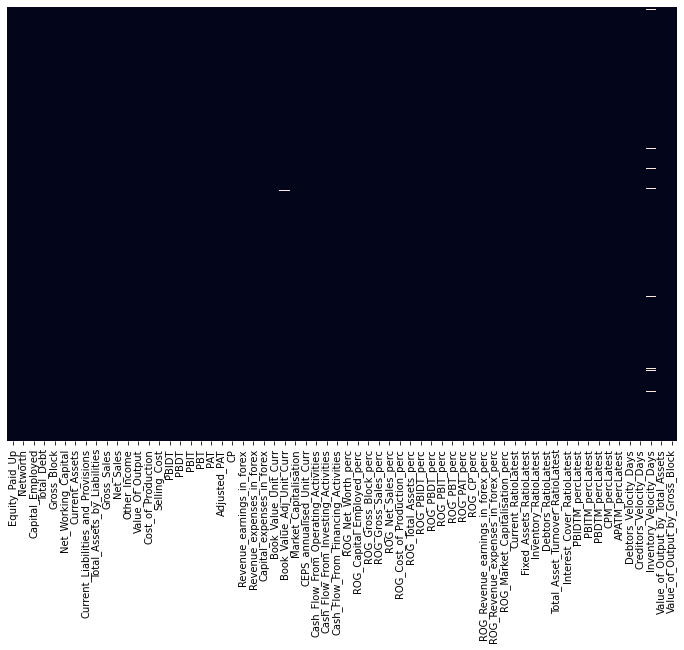

In [19]:
plt.figure(figsize = (12,8))
sns.heatmap(df_X.isnull(), cbar = False, yticklabels = False)
plt.show()

# Treat missing values

Many ways to Treat Missing values.
1. Either Replace them with Median
2. Impute them with any imputer

We will use both mathod and analyze them separatly 

### Replace NULL  with Median

In [20]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    

In [21]:
df['default'].describe()

count    3586.000000
mean        0.108199
std         0.310674
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64

In [22]:
df.isnull().sum().sum()

0

### Outlier detection & Treatment

<AxesSubplot:>

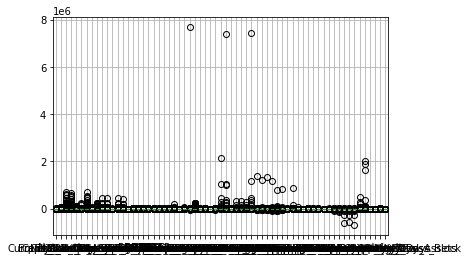

In [23]:
df.boxplot()

### Creating outlier identification (Lower & Upper whiskers) function

In [24]:
Q1=df_X.quantile(0.25)
Q3=df_X.quantile(0.55)
IQR=Q3-Q1
LR= Q1-(1.5 * IQR)
UR= Q3+(1.5 * IQR)

### Check total how many records are lying beyond upper and lower bounds limits

In [25]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']

In [26]:
((df_X>UR)|(df_X<LR)).sum()

Equity_Paid_Up                      905
Networth                           1342
Capital_Employed                   1220
Total_Debt                         1247
Gross_Block                        1236
                                   ... 
Debtors_Velocity_Days               738
Creditors_Velocity_Days             770
Inventory_Velocity_Days             719
Value_of_Output_by_Total_Assets     633
Value_of_Output_by_Gross_Block      984
Length: 64, dtype: int64

In [27]:
((df_X>UR)|(df_X<LR)).sum().sum()

80610

###  there are many ways we can Treat Outliers , Either we can bring back to Upper Limit or Lower limit to outliers
### Or we can impute them to K Nearest neighbure Method

In our Case, we dont know Company Segmentations, and COmpanies can have different levels of Revenue, Profits and all can be Valid at same time.

So we will Treat them with K nearest neighbure mathod, and Treat them same as we did for Missing values.

In [28]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [29]:
for column in df_X.columns:
    lr,ur=remove_outlier(df[column])
    df_X[column]=np.where(df_X[column]>ur,ur,df_X[column])
    df_X[column]=np.where(df_X[column]<lr,lr,df_X[column])

In [30]:
df = pd.concat([df_X, df_Y], axis = 1)

In [31]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [32]:
Company_imputed = df

In [33]:
Company_imputed.isnull().sum()

Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
Gross_Block                        0
                                  ..
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
default                            0
Length: 65, dtype: int64

In [34]:
Company_imputed.isnull().sum().sum()

0

<AxesSubplot:>

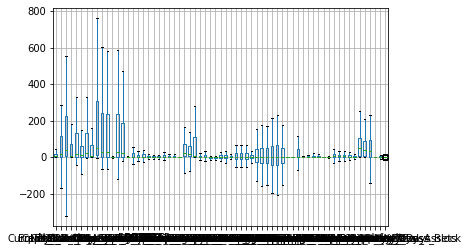

In [35]:
Company_imputed.boxplot()

### Univariate Analysis

### Check for the Distinct Value Counts of each field

In [36]:
for cols in df.columns:
    print(cols+':'+ str(df[cols].nunique()))

Equity_Paid_Up:1586
Networth:2334
Capital_Employed:2512
Total_Debt:1557
Gross_Block:1877
Net_Working_Capital:2078
Current_Assets:2199
Current_Liabilities_and_Provisions:1698
Total_Assets_by_Liabilities:2565
Gross_Sales:2081
Net_Sales:2079
Other_Income:545
Value_Of_Output:2097
Cost_of_Production:1975
Selling_Cost:531
PBIDT:1418
PBDT:1179
PBIT:1327
PBT:969
PAT:885
Adjusted_PAT:883
CP:1129
Revenue_earnings_in_forex:431
Revenue_expenses_in_forex:528
Capital_expenses_in_forex:1
Book_Value_Unit_Curr:2540
Book_Value_Adj_Unit_Curr:2483
Market_Capitalisation:1469
CEPS_annualised_Unit_Curr:1315
Cash_Flow_From_Operating_Activities:1340
Cash_Flow_From_Investing_Activities:922
Cash_Flow_From_Financing_Activities:989
ROG_Net_Worth_perc:1725
ROG_Capital_Employed_perc:1972
ROG_Gross_Block_perc:1103
ROG_Gross_Sales_perc:2084
ROG_Net_Sales_perc:2085
ROG_Cost_of_Production_perc:2069
ROG_Total_Assets_perc:2107
ROG_PBIDT_perc:2208
ROG_PBDT_perc:2201
ROG_PBIT_perc:2216
ROG_PBT_perc:2150
ROG_PAT_perc:2097
RO

In [37]:
for cols in df.columns:
    if df[cols].nunique()==1:
        print('Column name is '+cols+' and its unique value count is : '+ str(df[cols].nunique()))

Column name is Capital_expenses_in_forex and its unique value count is : 1
Column name is ROG_Revenue_earnings_in_forex_perc and its unique value count is : 1
Column name is ROG_Revenue_expenses_in_forex_perc and its unique value count is : 1


### Since these columns have only 1 value in it, we can not use it for our Predictions. So lets Drop these fields:

In [38]:
Company_imputed.drop('Capital_expenses_in_forex',axis=1, inplace=True)
Company_imputed.drop('ROG_Revenue_earnings_in_forex_perc',axis=1, inplace=True)
Company_imputed.drop('ROG_Revenue_expenses_in_forex_perc',axis=1, inplace=True)

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_pe

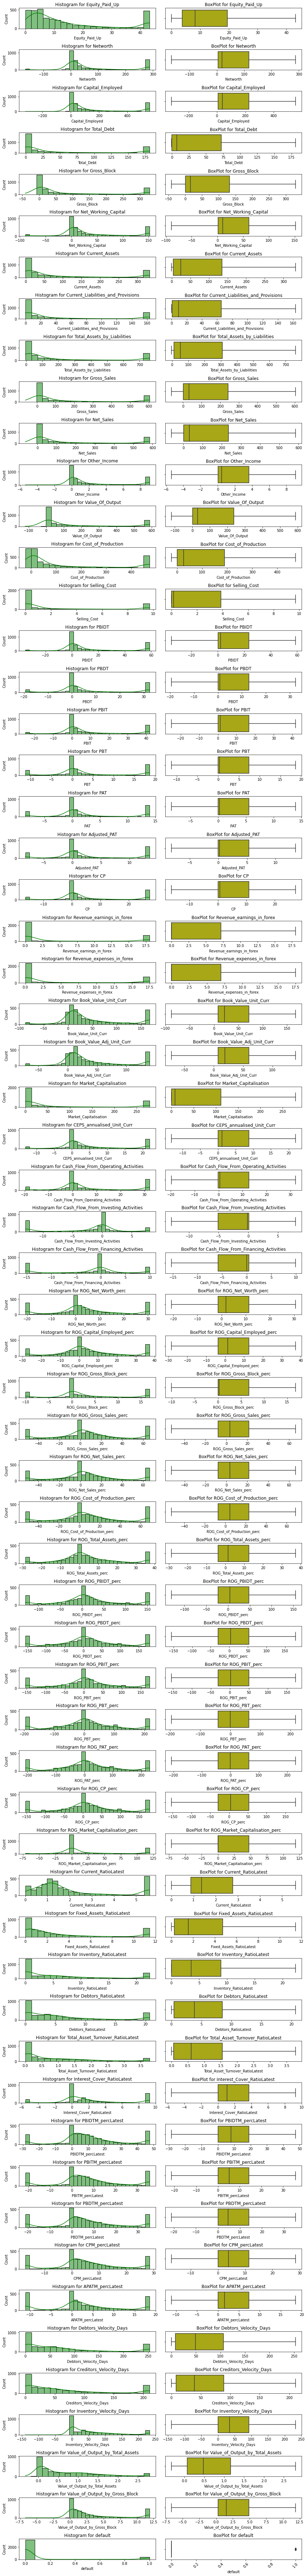

In [39]:
col_list=Company_imputed.columns
print(col_list)

fig, axes = plt.subplots(nrows=len(col_list),ncols=2)
fig.set_size_inches(12,100)
x=0
y=0
for i in Company_imputed.select_dtypes(include='number'):
        ax_hist=sns.histplot(x=Company_imputed[i], kde=True, ax=axes[x][y], color='g')
        ax_box=sns.boxplot(x=Company_imputed[i], data=Company_imputed, ax=axes[x][y+1], color='y')
        plt.xticks(rotation=45)
        ax_hist.set(xlabel=i,title='Histogram for '+i)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

In [40]:
Company_imputed.skew()

Equity_Paid_Up                     1.141900
Networth                           0.903328
Capital_Employed                   1.137131
Total_Debt                         1.197970
Gross_Block                        1.228742
                                     ...   
Creditors_Velocity_Days            1.143302
Inventory_Velocity_Days            1.206446
Value_of_Output_by_Total_Assets    1.110709
Value_of_Output_by_Gross_Block     1.183618
default                            2.523672
Length: 62, dtype: float64

#### Checking proportion of default

In [41]:
Company_imputed["default"].value_counts(normalize = True)

0    0.891801
1    0.108199
Name: default, dtype: float64

Data seems highly imbalanced

#### Bivariate Analysis: Default Vs. other variables

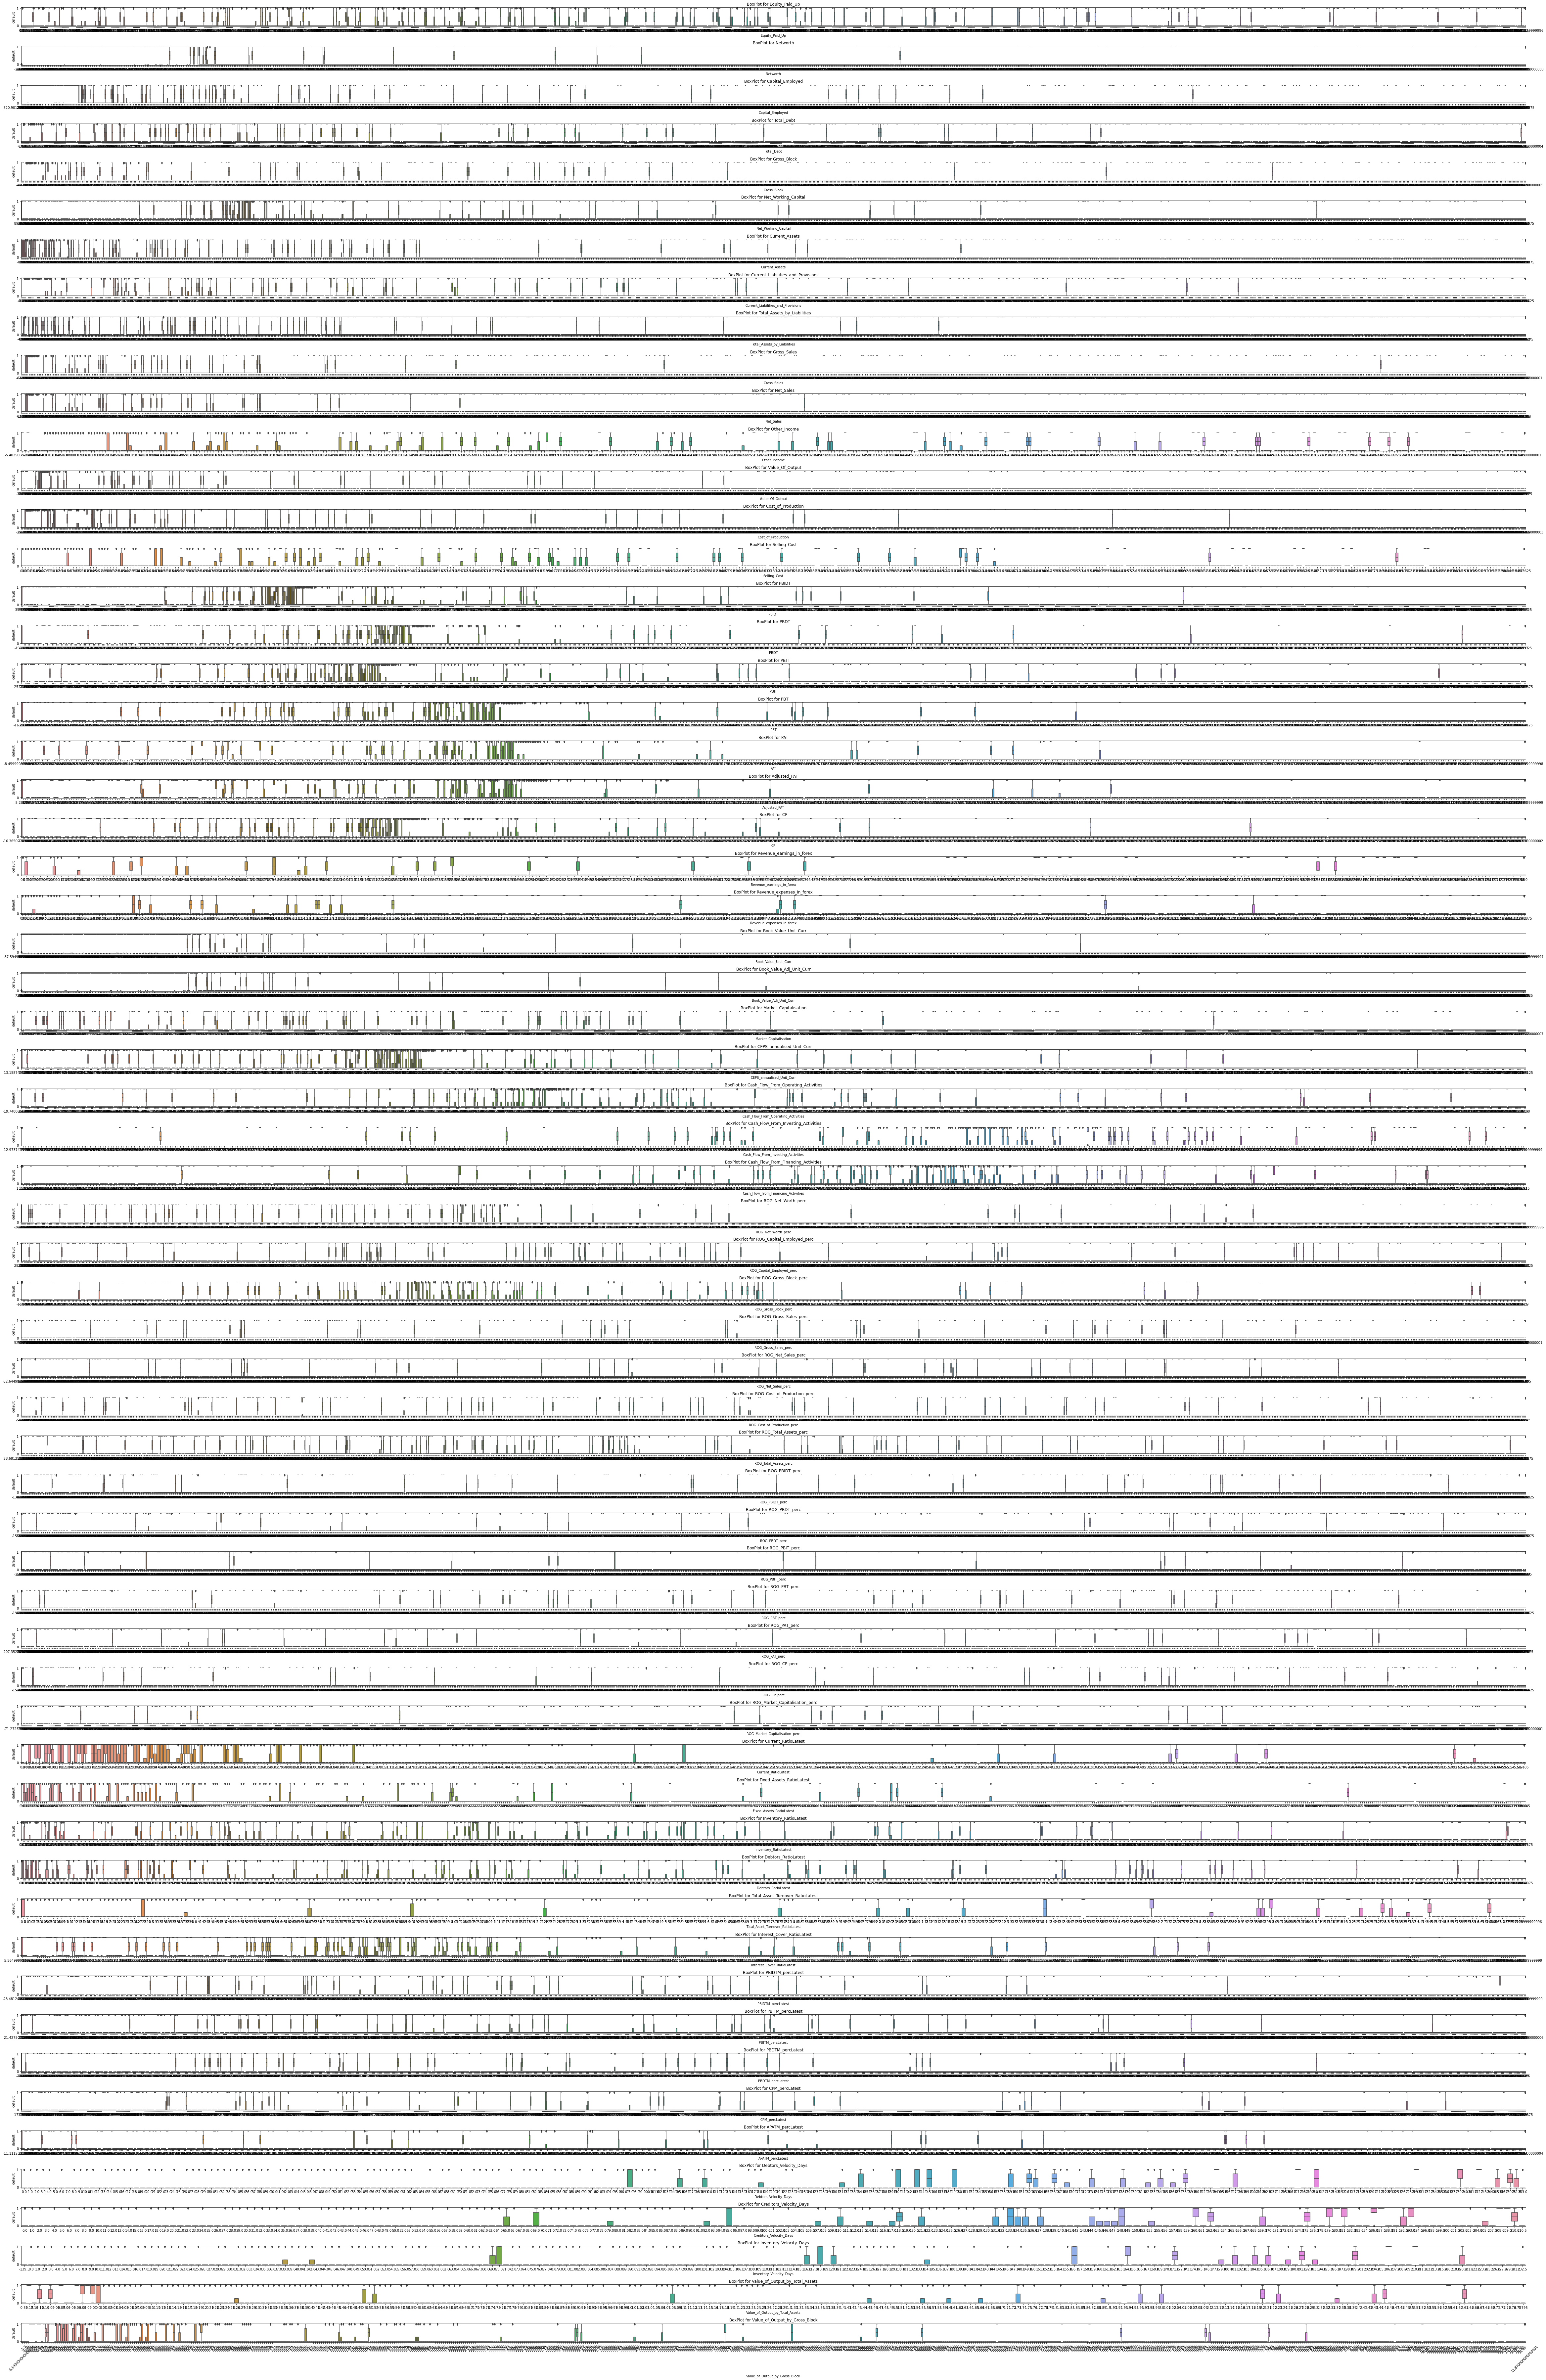

In [42]:
## sns.boxplot(x='economic.cond.household',y='vote', data=election_df)

col_names = list(Company_imputed.columns)
col_names.remove('default')

fig, axes = plt.subplots(nrows=len(col_names))
fig.set_size_inches(65,100)
x=0
y=0
for i in col_names:
        ax_box=sns.boxplot(x=i,y='default', data=Company_imputed, ax=axes[x])
        plt.xticks(rotation=45)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

### Correlation heatmap

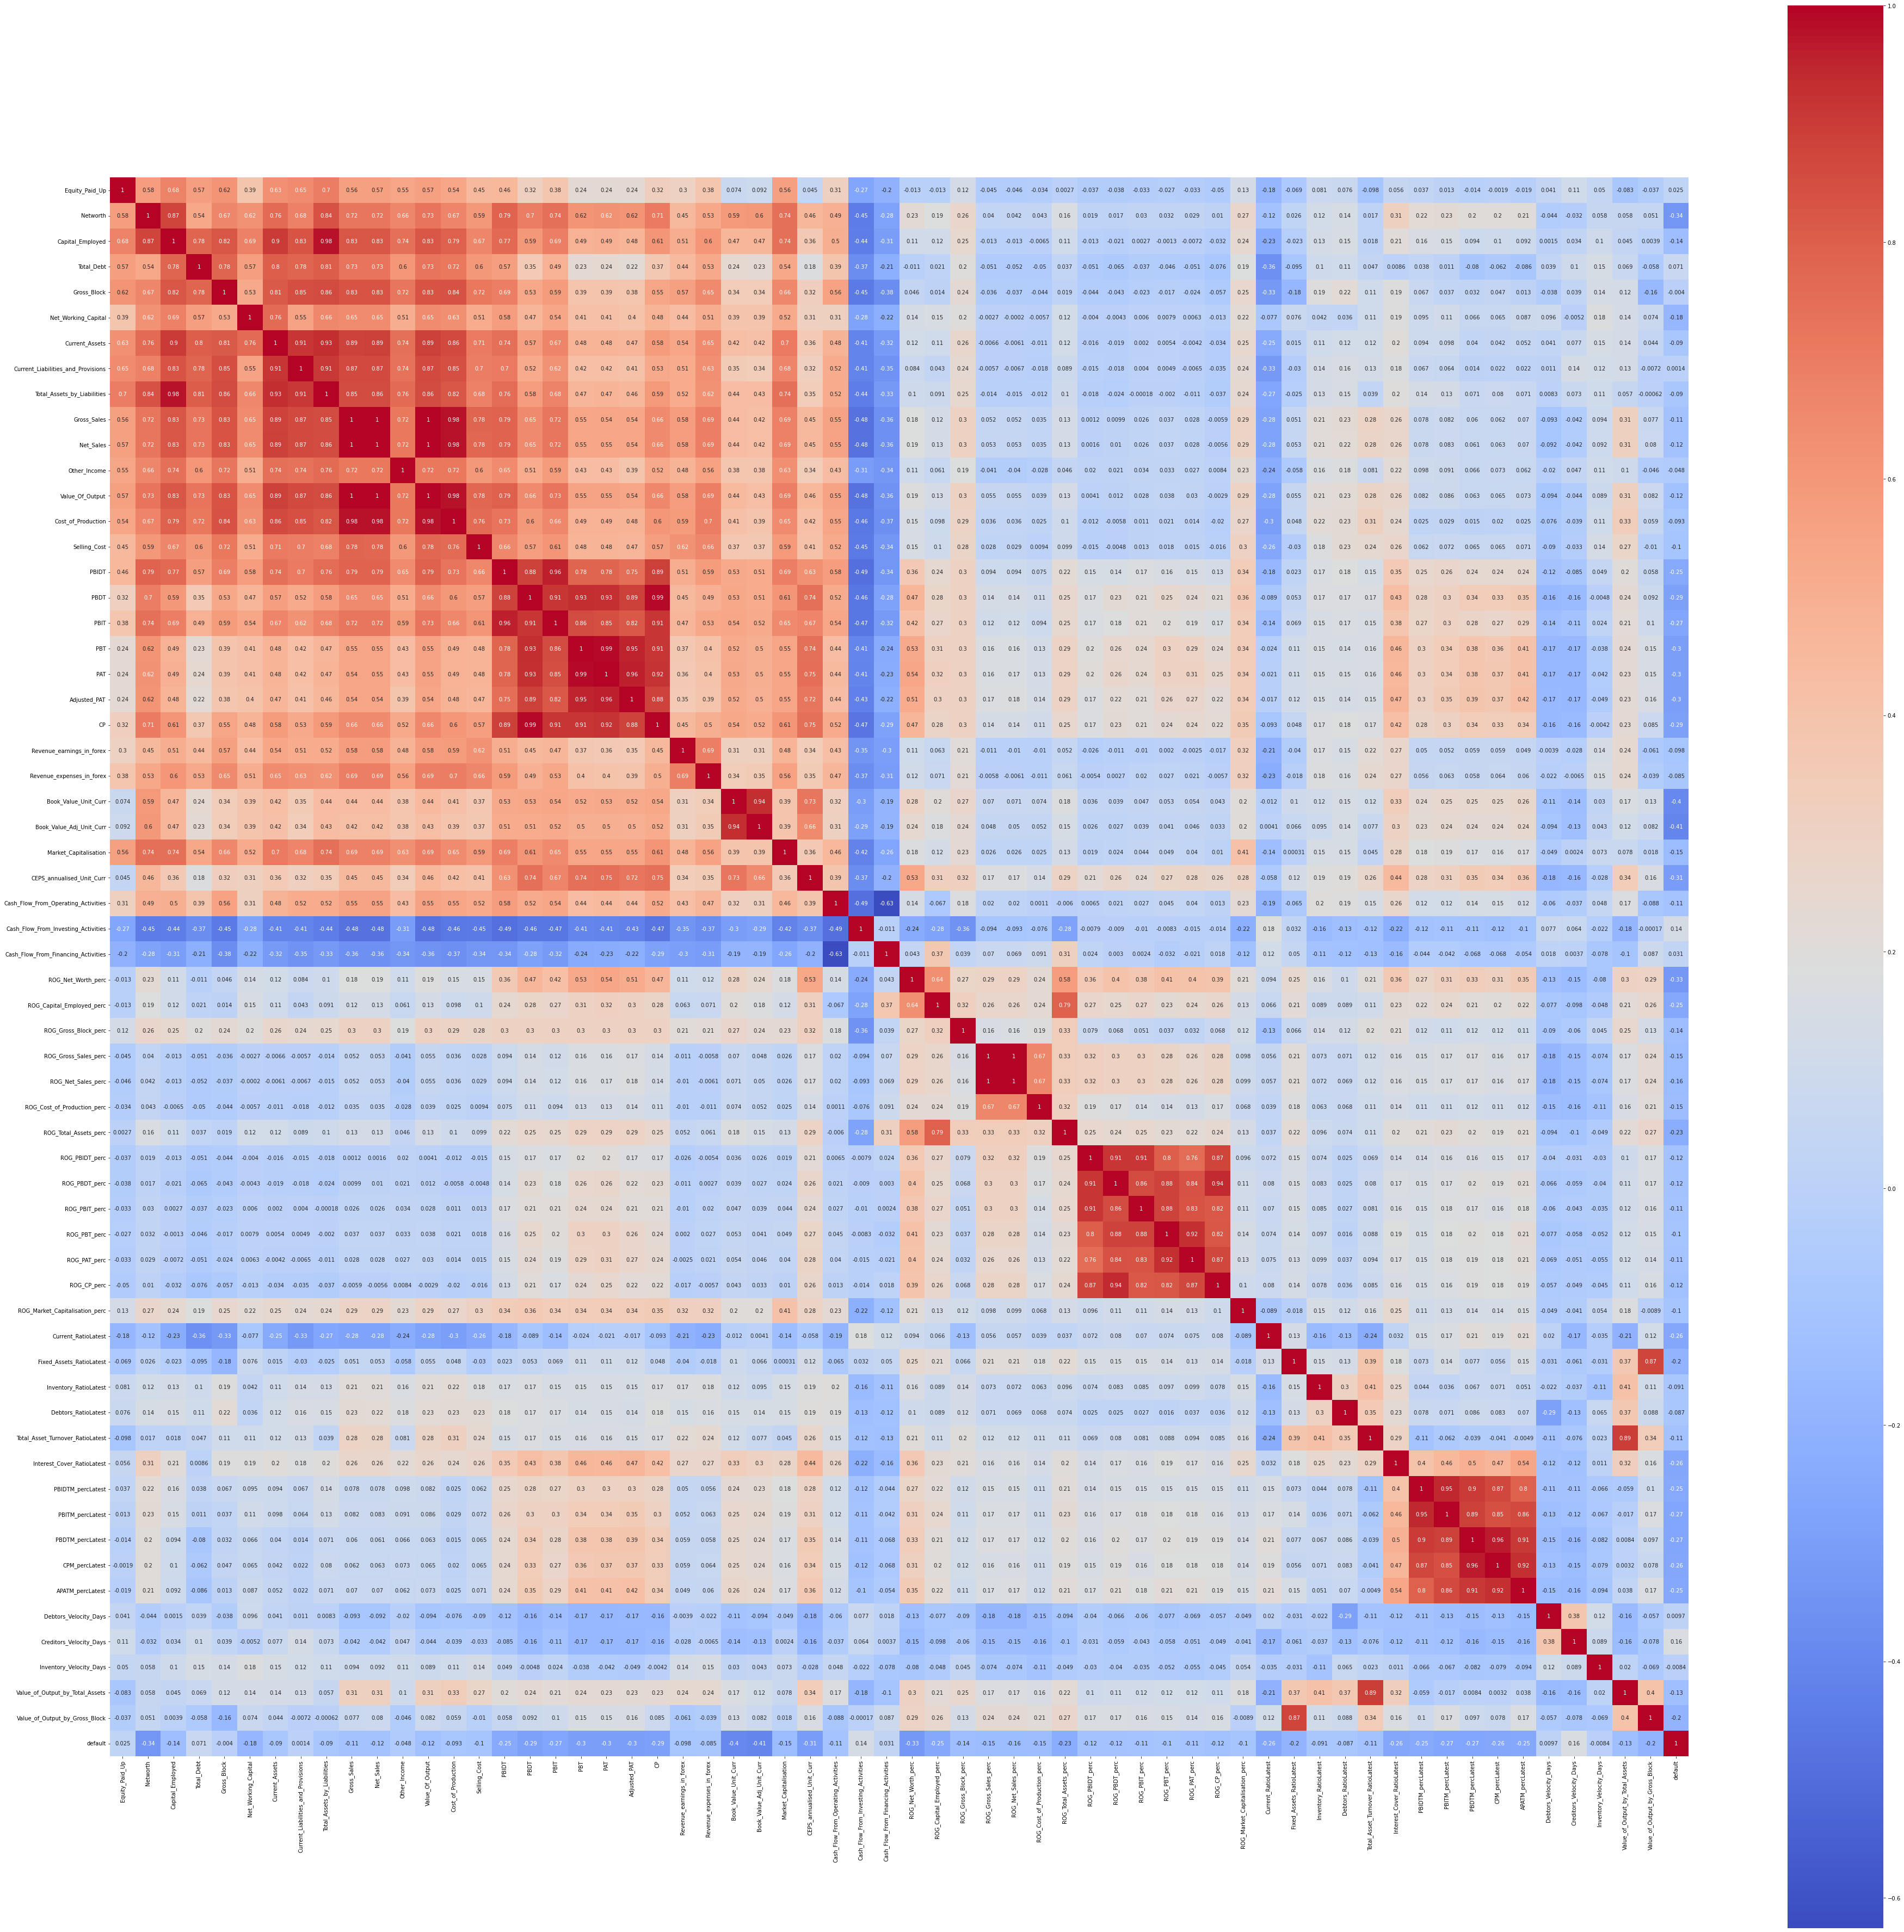

In [43]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(65,65))  # setting the size of figure to 12 by 10
p=sns.heatmap(Company_imputed.corr(), annot=True,cmap='coolwarm',square=True)

## Model Building using Stats Model  for 'Probability at default'

In [44]:
import statsmodels.formula.api as SM

# Model 1

In [45]:
Company_imputed.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_pe

##### Inference: 
Defaulters seem to have higher outstanding balance compared non-defaulters.
Defaulters' income seems lower compared to non-defaulters.

# Start of Credit Risk Modelling PD 

In [46]:
Company_imputed.head()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
0        43.16875  -166.215        -320.90125      180.83     328.8825   
1        43.16875  -166.215         555.10875      180.83     328.8825   
2        43.16875   287.405         555.10875      180.83     328.8825   
3        43.16875  -166.215         555.10875      180.83     328.8825   
4        43.16875  -166.215         555.10875      180.83     328.8825   

   Net_Working_Capital  Current_Assets  Current_Liabilities_and_Provisions  \
0            -89.40625        40.50000                           163.02625   
1            -89.40625       332.19375                           163.02625   
2            151.52375       332.19375                           163.02625   
3            -89.40625       332.19375                           163.02625   
4            151.52375       332.19375                           163.02625   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                     109.6000      0.00000       0.00        7.6000   
1                     760.5175    603.46125     583.94        9.0575   
2                     760.5175    392.13000     392.13        9.0575   
3                     760.5175    603.46125     583.94        9.0575   
4                     760.5175     38.72000      38.72        9.0575   

   Value_Of_Output  Cost_of_Production  Selling_Cost    PBIDT     PBDT  \
0           -0.070             137.670       0.00000 -35.1875 -19.4175   
1          587.475             472.465       9.70625  58.7525  -4.3200   
2          301.160             408.510       9.70625 -35.1875 -19.4175   
3          587.475             472.465       3.34000 -35.1875 -19.4175   
4           38.720             186.290       1.97000 -35.1875 -19.4175   

       PBIT       PBT   PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0 -25.00125 -11.28375 -8.46      -8.23875 -16.365                       0.00   
1  35.53000 -11.28375 -8.46      -8.23875  -4.320                       6.35   
2 -25.00125 -11.28375 -8.46      -8.23875 -16.365                       0.00   
3 -25.00125 -11.28375 -8.46      -8.23875 -16.365                       0.89   
4 -25.00125 -11.28375 -8.46      -8.23875 -16.365                       0.00   

   Revenue_expenses_in_forex  Book_Value_Unit_Curr  Book_Value_Adj_Unit_Curr  \
0                    0.00000               -87.595                  -72.2775   
1                   17.46875               -15.180                  -15.1800   
2                   17.46875                94.140                   94.1400   
3                   17.46875               -39.640                  -39.6400   
4                   15.62000               -87.595                  -72.2775   

   Market_Capitalisation  CEPS_annualised_Unit_Curr  \
0                0.00000                  -13.15875   
1              278.64375                   -0.02000   
2              278.64375                  -13.15875   
3              194.27000                  -13.15875   
4              113.68000                  -13.15875   

   Cash_Flow_From_Operating_Activities  Cash_Flow_From_Investing_Activities  \
0                               -19.74                              1.46000   
1                                32.08                            -12.97375   
2                               -19.74                            -12.97375   
3                                32.08                              7.97625   
4                               -19.74                              7.97625   

   Cash_Flow_From_Financing_Activities  ROG_Net_Worth_perc  \
0                                9.915            -15.3100   
1                                9.915            -20.7625   
2                                9.915            -20.7625   
3                              -15.305            -20.7625   
4                                9.915            -20.7625   

   ROG_Capital_Employed_perc  ROG_Gross_Block_perc  ROG_Gross_Sales_pe

#### Partitioning the data into train and test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = Company_imputed.drop('default', axis = 1)
y = Company_imputed['default']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [50]:
print(X_train.shape)
print(X_test.shape)

(2402, 61)
(1184, 61)


##### Why stratify = y?
Please note, because this data is highly imbalanced and could possibly result into different proportions in the y variable between train and test set.

In [51]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.89
1    0.11
Name: default, dtype: float64
 
0    0.89
1    0.11
Name: default, dtype: float64


# Model Building using Stats model for 'Probability at default'

#### Now, Importing statsmodels modules

In [52]:
import statsmodels.formula.api as SM

In [53]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [54]:
train.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_pe

In [55]:
f_1 = 'default~Equity_Paid_Up+Networth+Capital_Employed+Total_Debt+Gross_Block+Net_Working_Capital+Current_Assets+Current_Liabilities_and_Provisions+Total_Assets_by_Liabilities+Gross_Sales+Net_Sales+Other_Income+Value_Of_Output+Cost_of_Production+Selling_Cost+PBIDT+PBDT+PBIT+PBT+PAT+Adjusted_PAT+CP+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Gross_Sales_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIDT_perc+ROG_PBDT_perc+ROG_PBIT_perc+ROG_PBT_perc+ROG_PAT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_RatioLatest+Fixed_Assets_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBIDTM_percLatest+PBITM_percLatest+PBDTM_percLatest+CPM_percLatest+APATM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Total_Assets+Value_of_Output_by_Gross_Block'

#### Fitting the logistic regression model on imbalanced data

In [56]:
Stats_model_1 = SM.logit(formula = f_1, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.111581
         Iterations 12


#### Checking the parameters

In [57]:
Stats_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2340
Method:                           MLE   Df Model:                           61
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.6745
Time:                        04:50:08   Log-Likelihood:                -268.02
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.198e-192
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.1885      0.258     -0.732      0.464      -0.693       0.316
Equity_Paid_Up                         -0.0079      0.014     -0.585      0.559      -0.035       0.019
Networth                               -0.0056      0.005     -1.215      0.224      -0.015       0.003
Capital_Employed                       -0.0124      0.010     -1.294      0.196      -0.031       0.006
Total_Debt                              0.0213      0.007      3.008      0.003       0.007       0.035
Gross_Block                             0.0012      0.004      0.288      0.773      -0.007       0.009
Net_Working_Capital                    -0.0040      0.010     -0.400      0.689      -0.023       0.015
Current_Assets                          0.0053      0.008      0.640      0.522      -0.011       0.022
Current_Liabilities_and_Provisions      0.0010      0.013      0.081      0.935      -0.024       0.026
Total_Assets_by_Liabilities             0.0065      0.008      0.795      0.427      -0.010       0.023
Gross_Sales                            -0.0114      0.010     -1.113      0.266      -0.031       0.009
Net_Sales                               0.0203      0.022      0.939      0.348      -0.022       0.063
Other_Income                           -0.0076      0.079     -0.097      0.923      -0.162       0.147
Value_Of_Output                        -0.0188      0.014     -1.348      0.178      -0.046       0.009
Cost_of_Production                      0.0065      0.013      0.510      0.610      -0.018       0.031
Selling_Cost                           -0.0350      0.103     -0.340      0.734      -0.237       0.167
PBIDT                                  -0.0177      0.040     -0.438      0.661      -0.097       0.062
PBDT                                   -0.1551      0.145     -1.069      0.285      -0.440       0.129
PBIT                                    0.0184      0.050      0.368      0.713      -0.080       0.117
PBT                                     0.0480      0.212      0.226      0.821      -0.368       0.464
PAT                                    -0.0803      0.247     -0.325      0.745      -0.565       0.404
Adjusted_PAT                            0.0038      0.077      0.050      0.960      -0.147       0.155
CP                                      0.1585      0.154      1.028      0.304      -0.144       0.461
Revenue_earnings_in_forex              -0.0277      0.037     -0.754      0.451      -0.100       0.044
Revenue_expenses_in_forex               0.0533      0.038      1.414      0.157      -0.021       0.127
Book_Value_Unit_Curr                   -0.0215      0.035     -0.622      0.534      -0.089       0.046
Book_Value_Adj_Unit_Curr               -0.0684      0.036     -1.878      0.060      -0.140       0.003
Market_Capitalisation                  -0.0043      0.004     -1.205      0.228      -0.011       0.003
CEPS_annualised_U

### Matrics for Stats Model on Train and Test data

In [58]:
##  Validating the model on train set

from sklearn.metrics import confusion_matrix, classification_report
y_pred_train = np.where(Stats_model_1.predict(train) > 0.5, 1, 0)
print('Confusion Matrix','\n',confusion_matrix(y_train, y_pred_train))
print('Classification Report','\n'+classification_report(y_train, y_pred_train))

Confusion Matrix 
 [[2116   26]
 [  66  194]]
Classification Report 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2142
           1       0.88      0.75      0.81       260

    accuracy                           0.96      2402
   macro avg       0.93      0.87      0.89      2402
weighted avg       0.96      0.96      0.96      2402



In [59]:
## Validating the model on test set

y_pred_test = np.where(Stats_model_1.predict(test) > 0.5, 1, 0)
print('Confusion Matrix','\n',confusion_matrix(y_test, y_pred_test),'\n')
print('Classification Report','\n'+classification_report(y_test, y_pred_test))


Confusion Matrix 
 [[1035   21]
 [  38   90]] 

Classification Report 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1056
           1       0.81      0.70      0.75       128

    accuracy                           0.95      1184
   macro avg       0.89      0.84      0.86      1184
weighted avg       0.95      0.95      0.95      1184



In [60]:
stats_m1_train_acc=0.96
stats_m1_train_auc="Not applicable"
stats_m1_train_recall=0.75
stats_m1_train_precision=0.88
stats_m1_train_f1=0.81

stats_m1_test_acc=0.95
stats_m1_test_auc="Not applicable"
stats_m1_test_recall=0.70
stats_m1_test_precision=0.81
stats_m1_test_f1=0.75

#### We can see Lot of Fields have P value as more than 0.05, so we need to iliminate them , before we go further.
#### Also to Notice, since we have lot of fields, we can not go and check for each single columns, 
#### So lets check VIF in Loop and find the best features according to VIF

## For this testing we will keep VIF thresold value as 5

In [61]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif = train.iloc[:,1:]
y = train['default']



In [62]:
thres = 5

while True:
    Cols = range(x_vif.shape[1])
    
    vif = np.array([variance_inflation_factor(x_vif.values, i) for i in Cols])
    if all(vif < thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif))
        x_vif = x_vif.iloc[:,Cols]

In [63]:
len(x_vif.columns)

34

In [64]:
x_vif.columns

Index(['Total_Debt', 'Net_Working_Capital', 'Other_Income', 'Selling_Cost',
       'Adjusted_PAT', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIT_perc', 'ROG_CP_perc',
       'ROG_Market_Capitalisation_perc', 'Current_RatioLatest',
       'Inventory_RatioLatest', 'Debtors_RatioLatest',
       'Total_Asset_Turnover_RatioLatest', 'Interest_Cover_RatioLatest',
       'PBITM_percLatest', 'CPM_percLatest', 'Debtors_Velocity_Days',
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days',
       'Value_of_Output_by_Gross_Block', 'default'],
      dtype='object')

In [65]:
f_2 = 'default~Total_Debt+Net_Working_Capital+Other_Income+Selling_Cost+Adjusted_PAT+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+CEPS_annualised_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+PBITM_percLatest+CPM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Gross_Block'

In [66]:
Stats_model_2_VIF_Threshold_5 = SM.logit(formula = f_2, data= x_vif).fit()

Optimization terminated successfully.
         Current function value: 0.118405
         Iterations 10


In [67]:
Stats_model_2_VIF_Threshold_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           33
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.6546
Time:                        04:50:59   Log-Likelihood:                -284.41
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.364e-205
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2422      0.226     -1.072      0.284      -0.685       0.201
Total_Debt                              0.0157      0.004      3.831      0.000       0.008       0.024
Net_Working_Capital                    -0.0067      0.004     -1.643      0.100      -0.015       0.001
Other_Income                           -0.0227      0.066     -0.341      0.733      -0.153       0.108
Selling_Cost                           -0.0587      0.081     -0.725      0.469      -0.218       0.100
Adjusted_PAT                           -0.0126      0.049     -0.259      0.796      -0.108       0.083
Revenue_earnings_in_forex              -0.0358      0.033     -1.084      0.278      -0.101       0.029
Revenue_expenses_in_forex               0.0480      0.034      1.433      0.152      -0.018       0.114
Book_Value_Adj_Unit_Curr               -0.1004      0.010    -10.195      0.000      -0.120      -0.081
Market_Capitalisation                  -0.0081      0.003     -3.015      0.003      -0.013      -0.003
CEPS_annualised_Unit_Curr              -0.0670      0.037     -1.820      0.069      -0.139       0.005
Cash_Flow_From_Operating_Activities     0.0037      0.022      0.169      0.866      -0.039       0.047
Cash_Flow_From_Investing_Activities    -0.0143      0.041     -0.346      0.730      -0.095       0.067
Cash_Flow_From_Financing_Activities     0.0071      0.038      0.186      0.853      -0.067       0.082
ROG_Net_Worth_perc                     -0.0267      0.012     -2.317      0.021      -0.049      -0.004
ROG_Capital_Employed_perc               0.0220      0.010      2.230      0.026       0.003       0.041
ROG_Gross_Block_perc                   -0.0308      0.020     -1.512      0.131      -0.071       0.009
ROG_Net_Sales_perc                     -0.0020      0.004     -0.474      0.636      -0.010       0.006
ROG_Cost_of_Production_perc            -0.0062      0.004     -1.551      0.121      -0.014       0.002
ROG_Total_Assets_perc                  -0.0216      0.010     -2.231      0.026      -0.041      -0.003
ROG_PBIT_perc                           0.0028      0.002      1.188      0.235      -0.002       0.008
ROG_CP_perc                            -0.0016      0.002     -0.716      0.474      -0.006       0.003
ROG_Market_Capitalisation_perc         -0.0008      0.003     -0.290      0.772      -0.006       0.005
Current_RatioLatest                    -0.5418      0.091     -5.931      0.000      -0.721      -0.363
Inventory_RatioLatest                  -0.0537      0.023     -2.382      0.017      -0.098      -0.010
Debtors_RatioLatest                    -0.0274      0.023     -1.186      0.236      -0.073       0.018
Total_Asset_Turnover_RatioLatest        0.2183      0.132      1.648      0.099      -0.041       0.478
Interest_Cover_RatioLatest             -0.0728      0.047     -1.547      0.122      -0.165       0.019
PBITM_percLatest 

In [68]:
## Validating the model on train set

from sklearn.metrics import confusion_matrix, classification_report
y_pred_train = np.where(Stats_model_2_VIF_Threshold_5.predict(train) > 0.5, 1, 0)
print('Confusion Matrix','\n',confusion_matrix(y_train, y_pred_train))
print('Classification Report','\n',classification_report(y_train, y_pred_train))

Confusion Matrix 
 [[2114   28]
 [  71  189]]
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2142
           1       0.87      0.73      0.79       260

    accuracy                           0.96      2402
   macro avg       0.92      0.86      0.88      2402
weighted avg       0.96      0.96      0.96      2402



In [69]:
## Validating the model on test set

y_pred_test = np.where(Stats_model_2_VIF_Threshold_5.predict(test) > 0.5, 1, 0)
print('Confusion Matrix','\n',confusion_matrix(y_test, y_pred_test))
print('Classification Report','\n',classification_report(y_test, y_pred_test))

Confusion Matrix 
 [[1037   19]
 [  36   92]]
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1056
           1       0.83      0.72      0.77       128

    accuracy                           0.95      1184
   macro avg       0.90      0.85      0.87      1184
weighted avg       0.95      0.95      0.95      1184



In [70]:
stats_m2_vif_threshold_5_train_acc=0.96
stats_m2_vif_threshold_5_train_auc="Not applicable"
stats_m2_vif_threshold_5_train_recall=0.73
stats_m2_vif_threshold_5_train_precision=0.87
stats_m2_vif_threshold_5_train_f1=0.79

stats_m2_vif_threshold_5_test_acc=0.95
stats_m2_vif_threshold_5_test_auc="Not applicable"
stats_m2_vif_threshold_5_test_recall=0.72
stats_m2_vif_threshold_5_test_precision=0.83
stats_m2_vif_threshold_5_test_f1=0.77

In [71]:
thres = 4

while True:
    Cols = range(x_vif.shape[1])
    
    vif = np.array([variance_inflation_factor(x_vif.values, i) for i in Cols])
    if all(vif < thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif))
        x_vif = x_vif.iloc[:,Cols]

In [72]:
len(x_vif.columns)

31

In [73]:
x_vif.columns

Index(['Total_Debt', 'Net_Working_Capital', 'Other_Income', 'Adjusted_PAT',
       'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIT_perc', 'ROG_CP_perc',
       'ROG_Market_Capitalisation_perc', 'Current_RatioLatest',
       'Inventory_RatioLatest', 'Debtors_RatioLatest',
       'Total_Asset_Turnover_RatioLatest', 'Interest_Cover_RatioLatest',
       'CPM_percLatest', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Days', 'Value_of_Output_by_Gross_Block', 'default'],
      dtype='object')

In [74]:
f_3 = 'default~Total_Debt+Net_Working_Capital+Other_Income+Adjusted_PAT+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+CPM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Gross_Block'

In [75]:
Stats_model_3_VIF_Threshold_4 = SM.logit(formula = f_3, data= x_vif).fit()

Optimization terminated successfully.
         Current function value: 0.119954
         Iterations 10


In [76]:
Stats_model_3_VIF_Threshold_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2371
Method:                           MLE   Df Model:                           30
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.6501
Time:                        04:51:03   Log-Likelihood:                -288.13
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.990e-206
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2233      0.225     -0.993      0.321      -0.664       0.218
Total_Debt                              0.0143      0.004      3.595      0.000       0.006       0.022
Net_Working_Capital                    -0.0064      0.004     -1.687      0.092      -0.014       0.001
Other_Income                           -0.0546      0.065     -0.843      0.399      -0.182       0.072
Adjusted_PAT                           -0.0448      0.044     -1.021      0.307      -0.131       0.041
Revenue_earnings_in_forex              -0.0454      0.031     -1.457      0.145      -0.106       0.016
Revenue_expenses_in_forex               0.0477      0.033      1.463      0.143      -0.016       0.112
Book_Value_Adj_Unit_Curr               -0.1006      0.010    -10.439      0.000      -0.120      -0.082
Market_Capitalisation                  -0.0079      0.003     -3.007      0.003      -0.013      -0.003
Cash_Flow_From_Operating_Activities    -0.0026      0.022     -0.119      0.905      -0.045       0.040
Cash_Flow_From_Investing_Activities    -0.0153      0.039     -0.388      0.698      -0.092       0.062
Cash_Flow_From_Financing_Activities     0.0049      0.037      0.132      0.895      -0.068       0.078
ROG_Net_Worth_perc                     -0.0284      0.011     -2.531      0.011      -0.050      -0.006
ROG_Capital_Employed_perc               0.0197      0.010      2.033      0.042       0.001       0.039
ROG_Gross_Block_perc                   -0.0265      0.020     -1.310      0.190      -0.066       0.013
ROG_Net_Sales_perc                     -0.0022      0.004     -0.537      0.591      -0.010       0.006
ROG_Cost_of_Production_perc            -0.0060      0.004     -1.519      0.129      -0.014       0.002
ROG_Total_Assets_perc                  -0.0229      0.010     -2.372      0.018      -0.042      -0.004
ROG_PBIT_perc                           0.0025      0.002      1.049      0.294      -0.002       0.007
ROG_CP_perc                            -0.0017      0.002     -0.769      0.442      -0.006       0.003
ROG_Market_Capitalisation_perc         -0.0008      0.003     -0.304      0.761      -0.006       0.005
Current_RatioLatest                    -0.5498      0.091     -6.054      0.000      -0.728      -0.372
Inventory_RatioLatest                  -0.0503      0.023     -2.224      0.026      -0.095      -0.006
Debtors_RatioLatest                    -0.0281      0.023     -1.224      0.221      -0.073       0.017
Total_Asset_Turnover_RatioLatest        0.1895      0.130      1.458      0.145      -0.065       0.444
Interest_Cover_RatioLatest             -0.0896      0.047     -1.902      0.057      -0.182       0.003
CPM_percLatest                         -0.0253      0.011     -2.345      0.019      -0.046      -0.004
Debtors_Velocity_Days                  -0.0037      0.001     -2.616      0.009      -0.006      -0.001
Creditors_Velocit

In [77]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x_vif.columns
    vif["VIF"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

    return(vif)

X2 = x_vif
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
8   Cash_Flow_From_Operating_Activities  3.804148
7                 Market_Capitalisation  3.769023
12            ROG_Capital_Employed_perc  3.671089
0                            Total_Debt  3.620201
2                          Other_Income  3.483271
5             Revenue_expenses_in_forex  3.418506
18                          ROG_CP_perc  3.262816
17                        ROG_PBIT_perc  3.251599
23     Total_Asset_Turnover_RatioLatest  3.135009
16                ROG_Total_Assets_perc  3.108078
3                          Adjusted_PAT  3.033204
1                   Net_Working_Capital  2.902452
4             Revenue_earnings_in_forex  2.872264
10  Cash_Flow_From_Financing_Activities  2.863477
11                   ROG_Net_Worth_perc  2.719630
9   Cash_Flow_From_Investing_Activities  2.503964
6              Book_Value_Adj_Unit_Curr  2.460811
22                  Debtors_RatioLatest  2.346833
26                Debtors_Velocity_Days  2.345360
29       Value_of_Output_by_Gross_Block  2.316941
24           Interest_Cover_RatioLatest  2.250516
21                Inventory_RatioLatest  2.221555
27              Creditors_Velocity_Days  2.180764
20                  Current_RatioLatest  2.175016
14                   ROG_Net_Sales_perc  2.081818
15          ROG_Cost_of_Production_perc  1.995917
28              Inventory_Velocity_Days  1.860591
25                       CPM_percLatest  1.744019
19       ROG_Market_Capitalisation_perc  1.621405
13                 ROG_Gross_Block_perc  1.477094
30                              default  1.397951

# Also change the CUTOFF Limit to 0.4 , because if we have very small evidence of Company geting DEFAULT, if we consider them as DEFAULT, then lets see , how the data look like

### Validating the model on train set 

In [79]:
y_pred_train = np.where(Stats_model_3_VIF_Threshold_4.predict(train) > 0.4, 1, 0)

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
print(confusion_matrix(y_train, y_pred_train))

[[2094   48]
 [  55  205]]


In [82]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2142
           1       0.81      0.79      0.80       260

    accuracy                           0.96      2402
   macro avg       0.89      0.88      0.89      2402
weighted avg       0.96      0.96      0.96      2402



#### Validating the model on test set 

In [83]:
y_pred_test = np.where(Stats_model_3_VIF_Threshold_4.predict(test) > 0.4, 1, 0)

In [84]:
print(confusion_matrix(y_test, y_pred_test))

[[1027   29]
 [  27  101]]


In [85]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1056
           1       0.78      0.79      0.78       128

    accuracy                           0.95      1184
   macro avg       0.88      0.88      0.88      1184
weighted avg       0.95      0.95      0.95      1184



In [86]:
stats_m3_vif_threshold_5_cutoff_point_4_train_acc=0.96
stats_m3_vif_threshold_5_cutoff_point_4_train_auc="Not applicable"
stats_m3_vif_threshold_5_cutoff_point_4_train_recall=0.79
stats_m3_vif_threshold_5_cutoff_point_4_train_precision=0.81
stats_m3_vif_threshold_5_cutoff_point_4_train_f1=0.80

stats_m3_vif_threshold_5_cutoff_point_4_test_acc=0.95
stats_m3_vif_threshold_5_cutoff_point_4_test_auc="Not applicable"
stats_m3_vif_threshold_5_cutoff_point_4_test_recall=0.79
stats_m3_vif_threshold_5_cutoff_point_4_test_precision=0.78
stats_m3_vif_threshold_5_cutoff_point_4_test_f1=0.79

In [87]:
train.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_pe

# Lets balance the data, as Target values in dependent variable  is very less as compare to non Target values

In [88]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [89]:
Default_smote = pd.concat([X_res, y_res], axis = 1)

In [90]:
Company_imputed.groupby('default').mean()

Equity_Paid_Up   Networth  Capital_Employed  Total_Debt  Gross_Block  \
default                                                                         
0             13.871914  86.894378        162.542235   45.751198    85.266779   
1             15.006285 -35.133660         69.632751   61.351727    83.724098   

         Net_Working_Capital  Current_Assets  \
default                                        
0                  40.471894       95.173748   
1                   6.537365       59.981720   

         Current_Liabilities_and_Provisions  Total_Assets_by_Liabilities  \
default                                                                    
0                                  43.48798                   217.310117   
1                                  43.76990                   136.276778   

         Gross_Sales   Net_Sales  Other_Income  Value_Of_Output  \
default                                                           
0         168.463038  162.819906      2.492223       163.967326   
1          85.727571   82.426340      1.961295        80.067126   

         Cost_of_Production  Selling_Cost      PBIDT      PBDT       PBIT  \
default                                                                     
0                130.243235      2.608263  16.194834  8.448222  11.011503   
1                 78.048054      1.405767  -2.597146 -4.813003  -3.946669   

              PBT       PAT  Adjusted_PAT        CP  \
default                                               
0        4.400847  3.271792      3.075369  7.154545   
1       -3.972677 -3.094124     -3.092957 -4.110168   

         Revenue_earnings_in_forex  Revenue_expenses_in_forex  \
default                                                         
0                         4.743580                   4.577746   
1                         2.425747                   2.658534   

         Book_Value_Unit_Curr  Book_Value_Adj_Unit_Curr  \
default                                                   
0                   53.749354                 45.217721   
1                  -22.858170                -20.336952   

         Market_Capitalisation  CEPS_annualised_Unit_Curr  \
default                                                     
0                    78.115618                   5.781537   
1                    25.016569                  -3.140725   

         Cash_Flow_From_Operating_Activities  \
default                                        
0                                   6.964434   
1                                   1.854562   

         Cash_Flow_From_Investing_Activities  \
default                                        
0                                  -2.739147   
1                                  -0.095419   

         Cash_Flow_From_Financing_Activities  ROG_Net_Worth_perc  \
default                                                            
0                                  -2.319264            5.766395   
1                                  -1.563943           -9.416727   

         ROG_Capital_Employed_perc  ROG_Gross_Block_perc  \
default                                                    
0                         5.846858              3.323315   
1                        -7.969707             -0.163479   

         ROG_Gross_Sales_perc  ROG_Net_Sales_perc  \
default                                             
0                    8.347495            8.367128   
1                   -7.477004           -7.648763   

         ROG_Cost_of_Production_perc  ROG_Total_Assets_perc  ROG_PBIDT_perc  \
default                                                                       
0                           9.590363               5.591643       15.661764   
1                          -6.129536              -6.583421      -12.584172   

         ROG_PBDT_perc  ROG_PBIT_perc  ROG_PBT_perc  ROG_PAT_perc  \
default                                                             
0            14.782607      13.180469     12.039520     13.616172   
1      

In [91]:
Default_smote.groupby('default').mean()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
default                                                                        
0             13.697367  85.79771        160.601008   45.499837    84.322122   
1             13.872970 -33.99907         59.292888   54.632370    75.616325   

         Net_Working_Capital  Current_Assets  \
default                                        
0                  40.390298       93.806265   
1                   6.725407       51.884368   

         Current_Liabilities_and_Provisions  Total_Assets_by_Liabilities  \
default                                                                    
0                                 43.065711                   214.824029   
1                                 37.170657                   115.118033   

         Gross_Sales   Net_Sales  Other_Income  Value_Of_Output  \
default                                                           
0         165.244708  159.657544      2.477142       160.825411   
1          70.386278   67.508628      1.449637        65.998105   

         Cost_of_Production  Selling_Cost      PBIDT      PBDT       PBIT  \
default                                                                     
0                127.038707      2.613592  16.209194  8.513655  11.086283   
1                 66.159967      1.123307  -3.146735 -4.474580  -4.238085   

              PBT       PAT  Adjusted_PAT        CP  \
default                                               
0        4.402967  3.287754      3.093588  7.215437   
1       -3.640261 -2.872284     -2.875265 -3.785397   

         Revenue_earnings_in_forex  Revenue_expenses_in_forex  \
default                                                         
0                         4.761746                   4.522758   
1                         1.779134                   2.218034   

         Book_Value_Unit_Curr  Book_Value_Adj_Unit_Curr  \
default                                                   
0                   53.225763                 44.289015   
1                  -21.984271                -19.559143   

         Market_Capitalisation  CEPS_annualised_Unit_Curr  \
default                                                     
0                    77.946225                   5.774922   
1                    16.115148                  -2.877371   

         Cash_Flow_From_Operating_Activities  \
default                                        
0                                   7.048599   
1                                   1.071480   

         Cash_Flow_From_Investing_Activities  \
default                                        
0                                  -2.720971   
1                                   0.149487   

         Cash_Flow_From_Financing_Activities  ROG_Net_Worth_perc  \
default                                                            
0                                  -2.448247            5.658482   
1                                  -1.308946           -9.730857   

         ROG_Capital_Employed_perc  ROG_Gross_Block_perc  \
default                                                    
0                         5.478205              3.087255   
1                        -9.402723             -0.617788   

         ROG_Gross_Sales_perc  ROG_Net_Sales_perc  \
default                                             
0                    8.975518            9.008849   
1                   -7.720388           -7.922584   

         ROG_Cost_of_Production_perc  ROG_Total_Assets_perc  ROG_PBIDT_perc  \
default                                                                       
0                          10.076989               5.339415       16.136563   
1                          -8.455196              -7.950619      -13.471724   

         ROG_PBDT_perc  ROG_PBIT_perc  ROG_PBT_perc  ROG_PAT_perc  \
default                                                             
0            15.436993      13.558483     13.298874     13.890565   
1          

In [92]:
train_smote = pd.concat([X_res, y_res], axis = 1)

In [93]:
train_smote.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_pe

In [94]:
len(train_smote.columns)

62

In [95]:
thres = 4

while True:
    Cols = range(x_vif.shape[1])
    
    vif = np.array([variance_inflation_factor(x_vif.values, i) for i in Cols])
    if all(vif < thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif))
        x_vif = x_vif.iloc[:,Cols]

In [96]:
len(x_vif.columns)

31

In [98]:
f_4 = 'default~Total_Debt+Net_Working_Capital+Other_Income+Adjusted_PAT+Revenue_earnings_in_forex+Revenue_expenses_in_forex+Book_Value_Adj_Unit_Curr+Market_Capitalisation+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Net_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_RatioLatest+Inventory_RatioLatest+Debtors_RatioLatest+Total_Asset_Turnover_RatioLatest+Interest_Cover_RatioLatest+CPM_percLatest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_by_Gross_Block'

In [99]:
model_4 = SM.logit(formula = f_4, data= train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.174031
         Iterations 10


In [100]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3748
Model:                          Logit   Df Residuals:                     3717
Method:                           MLE   Df Model:                           30
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.7452
Time:                        08:47:29   Log-Likelihood:                -652.27
converged:                       True   LL-Null:                       -2559.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.6931      0.162     10.462      0.000       1.376       2.010
Total_Debt                              0.0240      0.003      7.305      0.000       0.018       0.030
Net_Working_Capital                    -0.0053      0.003     -1.782      0.075      -0.011       0.001
Other_Income                           -0.1006      0.050     -2.028      0.043      -0.198      -0.003
Adjusted_PAT                           -0.0177      0.029     -0.602      0.547      -0.075       0.040
Revenue_earnings_in_forex              -0.0699      0.024     -2.966      0.003      -0.116      -0.024
Revenue_expenses_in_forex               0.0389      0.024      1.609      0.108      -0.008       0.086
Book_Value_Adj_Unit_Curr               -0.1220      0.007    -17.710      0.000      -0.135      -0.108
Market_Capitalisation                  -0.0097      0.002     -4.788      0.000      -0.014      -0.006
Cash_Flow_From_Operating_Activities    -0.0262      0.016     -1.620      0.105      -0.058       0.006
Cash_Flow_From_Investing_Activities    -0.0400      0.031     -1.305      0.192      -0.100       0.020
Cash_Flow_From_Financing_Activities    -0.0079      0.028     -0.283      0.777      -0.062       0.047
ROG_Net_Worth_perc                     -0.0340      0.008     -4.402      0.000      -0.049      -0.019
ROG_Capital_Employed_perc               0.0231      0.007      3.354      0.001       0.010       0.037
ROG_Gross_Block_perc                   -0.0330      0.015     -2.201      0.028      -0.062      -0.004
ROG_Net_Sales_perc                     -0.0058      0.003     -1.793      0.073      -0.012       0.001
ROG_Cost_of_Production_perc            -0.0070      0.003     -2.447      0.014      -0.013      -0.001
ROG_Total_Assets_perc                  -0.0314      0.007     -4.631      0.000      -0.045      -0.018
ROG_PBIT_perc                           0.0043      0.002      2.548      0.011       0.001       0.008
ROG_CP_perc                            -0.0021      0.002     -1.300      0.194      -0.005       0.001
ROG_Market_Capitalisation_perc         -0.0027      0.002     -1.358      0.174      -0.007       0.001
Current_RatioLatest                    -0.6289      0.056    -11.244      0.000      -0.739      -0.519
Inventory_RatioLatest                  -0.0543      0.014     -3.784      0.000      -0.082      -0.026
Debtors_RatioLatest                    -0.0576      0.016     -3.514      0.000      -0.090      -0.025
Total_Asset_Turnover_RatioLatest        0.3287      0.089      3.707      0.000       0.155       0.503
Interest_Cover_RatioLatest             -0.0856      0.034     -2.515      0.012      -0.152      -0.019
CPM_percLatest                         -0.0507      0.008     -6.185      0.000      -0.067      -0.035
Debtors_Velocity_Days                  -0.0059      0.001     -5.662      0.000      -0.008      -0.004
Creditors_Velocit

In [101]:
y_pred_train_smote = np.where(model_4.predict(train_smote) > 0.5, 1, 0)

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

In [103]:
print(confusion_matrix(y_res, y_pred_train_smote))

[[2009  133]
 [  84 1522]]


In [104]:
print(classification_report(y_res, y_pred_train_smote))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2142
           1       0.92      0.95      0.93      1606

    accuracy                           0.94      3748
   macro avg       0.94      0.94      0.94      3748
weighted avg       0.94      0.94      0.94      3748



In [105]:
y_pred_test_smote = np.where(model_4.predict(test) > 0.5, 1, 0)

In [106]:
print(confusion_matrix(y_test, y_pred_test_smote))

[[972  84]
 [ 11 117]]


In [107]:
print(classification_report(y_test, y_pred_test_smote))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1056
           1       0.58      0.91      0.71       128

    accuracy                           0.92      1184
   macro avg       0.79      0.92      0.83      1184
weighted avg       0.94      0.92      0.93      1184



In [109]:
stats_m4_smote_train_acc=0.94
stats_m4_smote_train_auc="Not applicable"
stats_m4_smote_train_recall=0.95
stats_m4_smote_train_precision=0.92
stats_m4_smote_train_f1=0.93

stats_m4_smote_test_acc=0.92
stats_m4_smote_test_auc="Not applicable"
stats_m4_smote_test_recall=0.91
stats_m4_smote_test_precision=0.58
stats_m4_smote_test_f1=0.71


### Perform Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV

In [111]:
X_train.head()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
842          3.25000      3.49              3.54        0.05         1.53   
1057         4.75000      5.29              5.39        0.02         0.75   
1595        13.06000     13.50             13.50        0.00         0.00   
100         43.16875    -60.79            -58.30        2.46        18.66   
1191         4.00000      5.95             20.62       14.33         7.76   

      Net_Working_Capital  Current_Assets  Current_Liabilities_and_Provisions  \
842                  2.94            2.98                                0.05   
1057                 3.56            3.62                                0.06   
1595                13.47           13.62                                0.15   
100                -84.10            7.69                               91.79   
1191                 7.38           22.22                               14.83   

      Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
842                          3.59         0.42       0.42          0.00   
1057                         5.45         1.88       1.88          0.72   
1595                        13.65         0.12       0.12          0.75   
100                         33.49         0.76       0.76          0.34   
1191                        35.45       142.80     142.80          2.64   

      Value_Of_Output  Cost_of_Production  Selling_Cost    PBIDT     PBDT  \
842              0.42                0.25          0.01   0.1500   0.1400   
1057             1.88                1.35          0.14   0.5100   0.5000   
1595            -0.28                0.08          0.00   0.2300   0.2300   
100              0.79                0.83          0.02 -35.1875 -19.4175   
1191           142.80              138.75          0.58   3.6300   1.7000   

          PBIT       PBT   PAT  Adjusted_PAT      CP  \
842    0.03000   0.02000  0.01       0.01000   0.130   
1057   0.42000   0.41000  0.41       0.41000   0.500   
1595   0.23000   0.23000  0.16       0.16000   0.160   
100  -25.00125 -11.28375 -8.46      -8.23875 -16.365   
1191   3.02000   1.09000  0.73       0.73000   1.340   

      Revenue_earnings_in_forex  Revenue_expenses_in_forex  \
842                        0.00                        0.0   
1057                       0.00                        0.0   
1595                       0.00                        0.0   
100                        0.01                        0.0   
1191                       0.00                        0.0   

      Book_Value_Unit_Curr  Book_Value_Adj_Unit_Curr  Market_Capitalisation  \
842                  10.74                     10.74                   0.00   
1057                 11.14                     11.14                   0.00   
1595                  1.03                      1.03                 257.28   
100                  -8.37                     -8.37                   6.32   
1191                 14.87                      1.49                   0.00   

      CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
842                     0.40000                                 0.04   
1057                    1.05000                                -0.38   
1595                    0.01000                                 0.03   
100                   -13.15875                                 0.02   
1191                    3.35000                                -0.11   

      Cash_Flow_From_Investing_Activities  \
842                                  0.00   
1057                                -1.25   
1595                                 0.00   
100                                  0.00   
1191                                -0.21   

      Cash_Flow_From_Financing_Activities  ROG_Net_Worth_perc  \
842                                 -0.02              0.2900   
1057                                 1.64             30.6375   
1595                                 0.00              1.2

In [112]:
y_train.head()

842     0
1057    0
1595    0
100     1
1191    0
Name: default, dtype: int32

In [113]:
#Applying GridSearchCV
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.01,0.001]}

In [114]:
logistic_model = LogisticRegression(max_iter=10000,n_jobs=2)

In [115]:
grid_search_logit = GridSearchCV(estimator = logistic_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [116]:
grid_search_logit.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.01, 0.001]},
             scoring='f1')

In [117]:
print(grid_search_logit.best_params_,'\n')
print(grid_search_logit.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=0.01)


In [119]:
best_model_logit = grid_search_logit.best_estimator_

In [120]:
# Prediction on the training set
y_train_predict_logit = best_model_logit.predict(X_train)
y_train_predict_logit

array([0, 0, 0, ..., 0, 1, 0])

In [121]:
# Prediction on the test set
y_test_predict_logit = best_model_logit.predict(X_test)
y_test_predict_logit

array([1, 0, 0, ..., 0, 0, 0])

In [122]:
#Probabilities on the test set
y_test_predict_logit_prob=best_model_logit.predict_proba(X_test)
pd.DataFrame(y_test_predict_logit_prob).head()

0             1
0  0.421427  5.785726e-01
1  1.000000  1.710586e-09
2  0.999999  7.639451e-07
3  0.994823  5.177311e-03
4  0.999703  2.967061e-04

### Matrics for Logistic Regression Model on testing data

In [127]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

Accuracy of the Logistic Regression Model is  0.9535472972972973 

Confusion Matrix 
 [[1039   17]
 [  38   90]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1056
           1       0.84      0.70      0.77       128

    accuracy                           0.95      1184
   macro avg       0.90      0.84      0.87      1184
weighted avg       0.95      0.95      0.95      1184



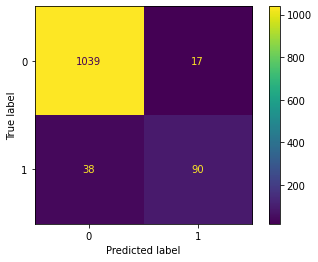

In [128]:
## Generate the Confusion Matrix and Classification Report for Test data set
print('Accuracy of the Logistic Regression Model is ',best_model_logit.score(X_test, y_test), '\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_test_predict_logit),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_test_predict_logit))
plot_confusion_matrix(best_model_logit,X_test,y_test)

AUC: 0.969


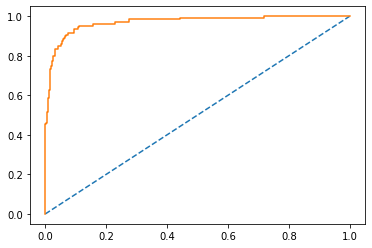

In [129]:
#AUC and ROC for the Testing data
probs = best_model_logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr);

### Matrics for Logistic Regression Model on Training data

Accuracy of the Logistic Regression Model is  0.9604496253122398 

Confusion Matrix 
 [[2114   28]
 [  67  193]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2142
           1       0.87      0.74      0.80       260

    accuracy                           0.96      2402
   macro avg       0.92      0.86      0.89      2402
weighted avg       0.96      0.96      0.96      2402



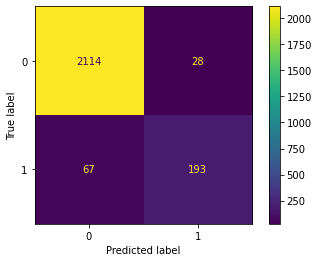

In [130]:
## Generate the Confusion Matrix and Classification Report for Test data set
print('Accuracy of the Logistic Regression Model is ',best_model_logit.score(X_train, y_train), '\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_train_predict_logit),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_train_predict_logit))
plot_confusion_matrix(best_model_logit,X_train,y_train)

AUC: 0.976


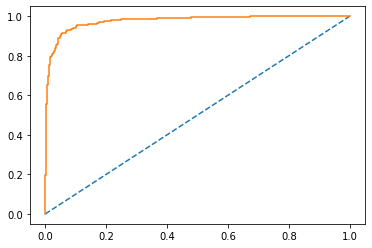

In [131]:
#AUC and ROC for the training data
probs = best_model_logit.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr);

In [132]:
logit_metrics=classification_report(y_train, y_train_predict_logit,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_train_f1=round(df.loc["1"][2],2)
logit_train_recall=round(df.loc["1"][1],2)
logit_train_precision=round(df.loc["1"][0],2)
logit_train_acc=best_model_logit.score(X_train, y_train)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print('logit_train_acc ',logit_train_acc)
print ('logit_train_f1 ',logit_train_f1,'\n')

logit_metrics=classification_report(y_test, y_test_predict_logit,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_test_f1=round(df.loc["1"][2],2)
logit_test_recall=round(df.loc["1"][1],2)
logit_test_precision=round(df.loc["1"][0],2)
logit_test_acc=best_model_logit.score(X_test, y_test)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print('logit_test_acc ',logit_test_acc)
print ('logit_test_f1 ',logit_test_f1,'\n')

logit_train_precision  0.87
logit_train_recall  0.74
logit_train_acc  0.9604496253122398
logit_train_f1  0.8 

logit_test_precision  0.84
logit_test_recall  0.7
logit_test_acc  0.9535472972972973
logit_test_f1  0.77 



### Building a Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8,10],
    'max_features': [8,10,12],
    'min_samples_leaf': [30,50,80],   ## 1-3% of training data set
    'min_samples_split': [100,150,200],   ## 3 times of min sample leaf
    'n_estimators': [100,200] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_random_forest = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [134]:
grid_search_random_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': [30, 50, 80],
                         'min_samples_split': [100, 150, 200],
                         'n_estimators': [100, 200]})

In [135]:
grid_search_random_forest.best_params_

{'max_depth': 8,
 'max_features': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 200,
 'n_estimators': 200}

In [136]:
best_grid_random_forest = grid_search_random_forest.best_estimator_

In [137]:
print(pd.DataFrame(best_grid_random_forest.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                                Imp
Book_Value_Unit_Curr       0.234250
Networth                   0.197338
Book_Value_Adj_Unit_Curr   0.192101
Capital_Employed           0.048405
Current_RatioLatest        0.040189
...                             ...
Cost_of_Production         0.000004
Debtors_Velocity_Days      0.000002
Revenue_expenses_in_forex  0.000002
Inventory_RatioLatest      0.000002
Revenue_earnings_in_forex  0.000000

[61 rows x 1 columns]


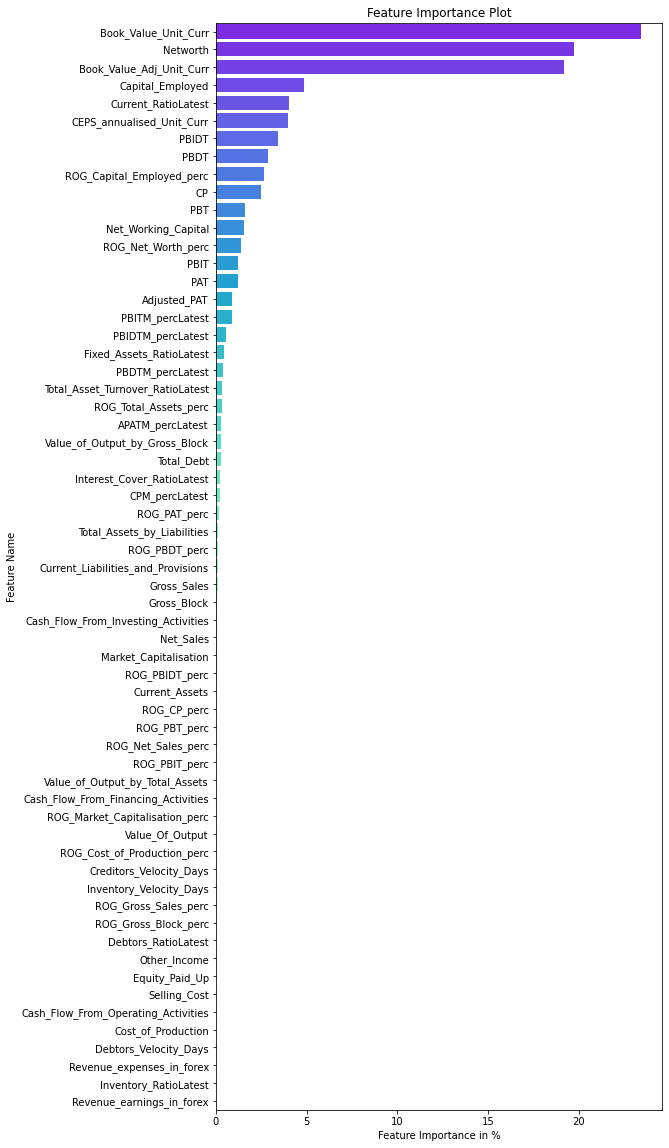

In [138]:
##Print Feature Importances
x=pd.DataFrame(best_grid_random_forest.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(8,20))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [140]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [141]:
rf_ytrain_predict = best_grid_random_forest.predict(X_train)
rf_ytest_predict = best_grid_random_forest.predict(X_test)

rf_ytrain_predict_proba = best_grid_random_forest.predict_proba(X_train)
rf_ytest_predict_proba = best_grid_random_forest.predict_proba(X_test)

In [142]:
#### RF Model Performance Evaluation on Training and testing data set
print('Confusion Matrix for training data set is : \n',confusion_matrix(y_train,rf_ytrain_predict), end='\n\n')

print('Confusion Matrix for Testing data set is \n: ',confusion_matrix(y_test,rf_ytest_predict))

Confusion Matrix for training data set is : 
 [[2118   24]
 [  30  230]]

Confusion Matrix for Testing data set is 
:  [[1051    5]
 [  17  111]]


In [143]:
## Training data set
print('Classification report for Training data set is as follows :\n')
print(classification_report(y_train,rf_ytrain_predict))

print('\n\nClassification report for test data set is as follows :\n')
## Training data set
print(classification_report(y_test,rf_ytest_predict))

Classification report for Training data set is as follows :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2142
           1       0.91      0.88      0.89       260

    accuracy                           0.98      2402
   macro avg       0.95      0.94      0.94      2402
weighted avg       0.98      0.98      0.98      2402



Classification report for test data set is as follows :

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1056
           1       0.96      0.87      0.91       128

    accuracy                           0.98      1184
   macro avg       0.97      0.93      0.95      1184
weighted avg       0.98      0.98      0.98      1184



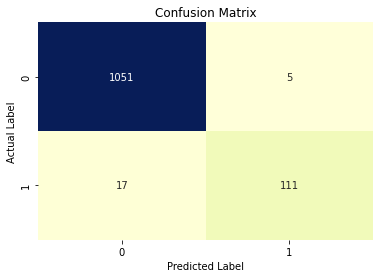

In [144]:
## Print Cofusion matrix for testing data set
sns.heatmap(confusion_matrix(y_test,rf_ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

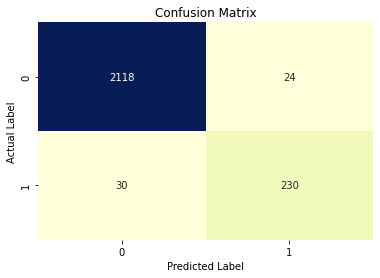

In [145]:
## Print Cofusion matrix for Training data set
sns.heatmap(confusion_matrix(y_train,rf_ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.991


Text(0, 0.5, 'True Positive Rate')

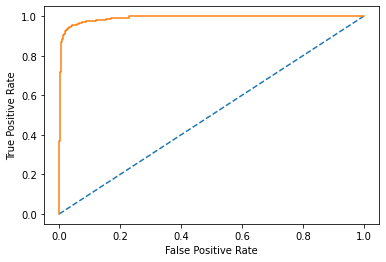

In [146]:
# predict probabilities for training data set
probs_rf = best_grid_random_forest.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs_rf)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AUC: 0.986


Text(0, 0.5, 'True Positive Rate')

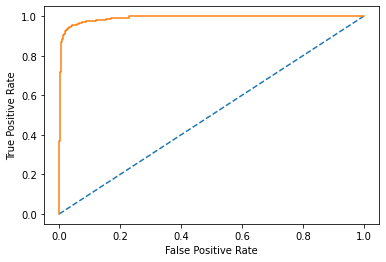

In [147]:
# predict probabilities for training data set
probs_rf = best_grid_random_forest.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_test, probs_rf)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test, probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [148]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
print('Accuracy Score for testing data using Randon Forest ',round(accuracy_score(y_test, rf_ytest_predict),2)*100,'%')
print('Area Under Curve  for testing data using Randon Forest is',round(roc_auc_score(y_test,best_grid_random_forest.predict_proba(X_test)[:,1]),2)*100,'%')

Accuracy Score for testing data using Randon Forest  98.0 %
Area Under Curve  for testing data using Randon Forest is 99.0 %


In [149]:
rf_accuracy_test = round((accuracy_score(y_test, rf_ytest_predict)),2)
rf_accuracy_train = round((accuracy_score(y_train, rf_ytrain_predict)),2)
rf_auc_train=round(roc_auc_score(y_test,best_grid_random_forest.predict_proba(X_test)[:,1]),2)
rf_auc_test=round(roc_auc_score(y_train,best_grid_random_forest.predict_proba(X_train)[:,1]),2)


rf_metrics_train=classification_report(y_train,rf_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics_train).transpose()
rf_train_f1=round(df.loc["1"][2],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_precision=round(df.loc["1"][0],2)


rf_metrics_test=classification_report(y_test,rf_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics_test).transpose()
rf_test_f1=round(df.loc["1"][2],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_precision=round(df.loc["1"][0],2)

print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)
print('rf_accuracy_train',rf_accuracy_train)
print('rf_auc_train',rf_auc_train)

print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)
print('rf_accuracy_test',rf_accuracy_test)
print('rf_auc_test',rf_auc_test)

rf_train_precision  0.91
rf_train_recall  0.88
rf_train_f1  0.89
rf_accuracy_train 0.98
rf_auc_train 0.99
rf_test_precision  0.96
rf_test_recall  0.87
rf_test_f1  0.91
rf_accuracy_test 0.98
rf_auc_test 0.99


### Perform LDA 

In [150]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [151]:
#Building a LDA Model
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train,y_train)

In [152]:
# Training data class Prediction, cut-off value = 0.5
y_predict_train_LDA = model_lda.predict(X_train)
y_predict_train_LDA

array([0, 0, 0, ..., 0, 1, 0])

In [153]:
# Test data class Prediction, cut-off value = 0.5
y_predict_test_LDA = model_lda.predict(X_test)
y_predict_test_LDA

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
# Training data probability prediction
y_pred_train_LDA_prob = model_lda.predict_proba(X_train)
y_pred_train_LDA_prob

array([[9.94250452e-01, 5.74954845e-03],
       [9.99825478e-01, 1.74521844e-04],
       [9.97077054e-01, 2.92294587e-03],
       ...,
       [9.99010620e-01, 9.89380252e-04],
       [1.16644711e-01, 8.83355289e-01],
       [9.99469879e-01, 5.30121005e-04]])

In [155]:
# Training data probability prediction
y_pred_test_LDA_prob = model_lda.predict_proba(X_test)
## sample record first 3 rows
y_pred_test_LDA_prob[:3,:]

array([[9.66966214e-01, 3.30337861e-02],
       [9.99159376e-01, 8.40623810e-04],
       [9.99959879e-01, 4.01211936e-05]])

Accuracy of the LDA Model is  0.9366554054054054 

Confusion Matrix 
 [[1037   19]
 [  56   72]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1056
           1       0.79      0.56      0.66       128

    accuracy                           0.94      1184
   macro avg       0.87      0.77      0.81      1184
weighted avg       0.93      0.94      0.93      1184



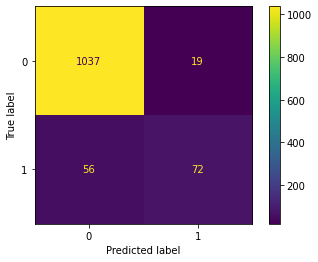

In [156]:
## Generate the Confusion Matrix and Classification Report for Test data set
print('Accuracy of the LDA Model is ',model_lda.score(X_test, y_test), '\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict_test_LDA),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict_test_LDA))
plot_confusion_matrix(model_lda,X_test,y_test)

AUC: 0.951


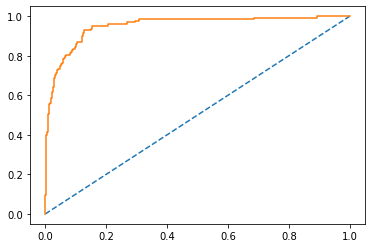

In [157]:
#AUC and ROC for the Testing data
probs = model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);

### Matrics for LDA Model on Training data

Accuracy of the LDA Model is  0.9408825978351374 

Confusion Matrix 
 [[2110   32]
 [ 110  150]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2142
           1       0.82      0.58      0.68       260

    accuracy                           0.94      2402
   macro avg       0.89      0.78      0.82      2402
weighted avg       0.94      0.94      0.94      2402



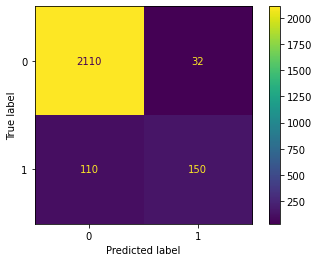

In [158]:
## Generate the Confusion Matrix and Classification Report for Test data set
print('Accuracy of the LDA Model is ',model_lda.score(X_train, y_train), '\n')
print('Confusion Matrix','\n',metrics.confusion_matrix(y_train, y_predict_train_LDA),'\n')
print('Classification Report','\n',metrics.classification_report(y_train, y_predict_train_LDA))
plot_confusion_matrix(model_lda,X_train,y_train)

AUC: 0.960


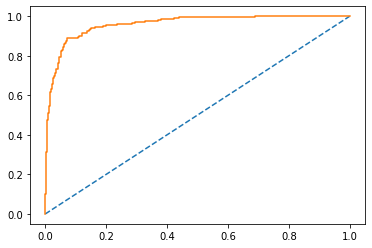

In [159]:
#AUC and ROC for the training data
probs = model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);

In [160]:
lda_metrics=classification_report(y_train, y_predict_train_LDA,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
lda_train_acc=model_lda.score(X_train, y_train)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print('lda_train_acc ',lda_train_acc)
print ('lda_train_f1 ',lda_train_f1,'\n')

lda_metrics=classification_report(y_test, y_predict_test_LDA,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_acc=model_lda.score(X_test, y_test)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print('lda_test_acc ',lda_test_acc)
print ('lda_test_f1 ',lda_test_f1)

lda_train_precision  0.82
lda_train_recall  0.58
lda_train_acc  0.9408825978351374
lda_train_f1  0.68 

lda_test_precision  0.79
lda_test_recall  0.56
lda_test_acc  0.9366554054054054
lda_test_f1  0.66


### Generate Precision, Recall and F1 Score for all Model for both train and Test data set

In [161]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'SM 1 Train':[stats_m1_train_acc,stats_m1_train_auc,stats_m1_train_recall,stats_m1_train_precision,stats_m1_train_f1],
        'SM 1 Test':[stats_m1_test_acc,stats_m1_test_auc,stats_m1_test_recall,stats_m1_test_precision,stats_m1_test_f1],
        'SM 2 Train':[stats_m2_vif_threshold_5_train_acc,stats_m2_vif_threshold_5_train_auc,stats_m2_vif_threshold_5_train_recall,stats_m2_vif_threshold_5_train_precision,stats_m2_vif_threshold_5_train_f1],
        'SM 2 Test':[stats_m2_vif_threshold_5_test_acc,stats_m2_vif_threshold_5_test_auc,stats_m2_vif_threshold_5_test_recall,stats_m2_vif_threshold_5_test_precision,stats_m2_vif_threshold_5_test_f1],
        'SM 3 Train':[stats_m3_vif_threshold_5_cutoff_point_4_train_acc,stats_m3_vif_threshold_5_cutoff_point_4_train_auc,stats_m3_vif_threshold_5_cutoff_point_4_train_recall,stats_m3_vif_threshold_5_cutoff_point_4_train_precision,stats_m3_vif_threshold_5_cutoff_point_4_train_f1],
        'SM 3 Test':[stats_m3_vif_threshold_5_cutoff_point_4_test_acc,stats_m3_vif_threshold_5_cutoff_point_4_test_auc,stats_m3_vif_threshold_5_cutoff_point_4_test_recall,stats_m3_vif_threshold_5_cutoff_point_4_test_precision,stats_m3_vif_threshold_5_cutoff_point_4_test_f1],
        'SM 4 Train':[stats_m4_smote_train_acc,stats_m4_smote_train_auc,stats_m4_smote_train_recall,stats_m4_smote_train_precision,stats_m4_smote_train_f1],
        'SM 4 Test':[stats_m4_smote_test_acc,stats_m4_smote_test_auc,stats_m4_smote_test_recall,stats_m4_smote_test_precision,stats_m4_smote_test_f1],
        'LR Train':[logit_train_acc,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
        'LR Test':[logit_test_acc,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
        'RF Train':[rf_accuracy_train,rf_auc_train,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_accuracy_test,rf_auc_test,rf_test_recall,rf_test_precision,rf_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
data2=data.T
round(data2.sort_values(by='Recall', ascending=False),2)


Accuracy             AUC Recall Precision F1 Score
SM 4 Train      0.94  Not applicable   0.95      0.92     0.93
SM 4 Test       0.92  Not applicable   0.91      0.58     0.71
RF Train        0.98            0.99   0.88      0.91     0.89
RF Test         0.98            0.99   0.87      0.96     0.91
SM 3 Train      0.96  Not applicable   0.79      0.81      0.8
SM 3 Test       0.95  Not applicable   0.79      0.78     0.79
SM 1 Train      0.96  Not applicable   0.75      0.88     0.81
LR Train     0.96045        0.976383   0.74      0.87      0.8
SM 2 Train      0.96  Not applicable   0.73      0.87     0.79
SM 2 Test       0.95  Not applicable   0.72      0.83     0.77
SM 1 Test       0.95  Not applicable    0.7      0.81     0.75
LR Test     0.953547        0.969445    0.7      0.84     0.77
LDA Train   0.940883        0.959538   0.58      0.82     0.68
LDA Test    0.936655        0.951349   0.56      0.79     0.66

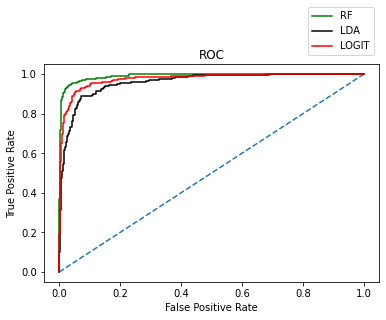

In [162]:
#ROC Curve for the 3 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
## plt.plot(dtree_train_fpr, dtree_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(lda_train_fpr,lda_train_tpr,color='black',label="LDA")
plt.plot(logit_train_fpr,logit_train_tpr,color='red',label="LOGIT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

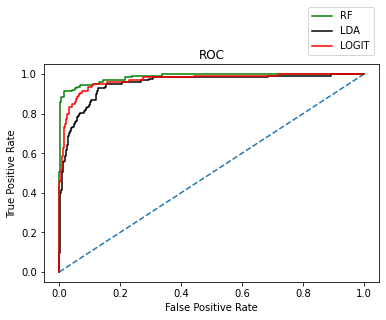

In [163]:
#### ROC Curve for the 3 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
## plt.plot(dtree_test_fpr, dtree_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(lda_test_fpr,lda_test_tpr,color='black',label="LDA")
plt.plot(logit_test_fpr,logit_test_tpr,color='red',label="LOGIT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# Problem 2 : Market Risk

## The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.
## Please find attached the files to be referred.

### Market Risk Dataset

###### You are expected to do the Market Risk Analysis using Python. 

#### Importing the libraries

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [165]:
Stocks = pd.read_csv('C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\11-Finance_and_Risk_analytics\\Week-2\\Project\\Market+Risk+Dataset.csv')

#Glimpse of Data
Stocks.head()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

#### Fixing messy column names (containing spaces) for ease of use

In [166]:
Stocks.columns = Stocks.columns.str.replace(' ', '_').str.replace('.', '')

In [167]:
print(Stocks.Date.min())
print(Stocks.Date.max())

01-01-2018
31-12-2018


In [168]:
Stocks.columns

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_&_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')

#### Checking top 5 rows again

In [169]:
Stocks.head()

Date  Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

#### First, let us check the number of rows (observations) and the number of columns (variables)

In [170]:
print('The number of rows (observations) is',Stocks.shape[0],'\n''The number of columns (variables) is',Stocks.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


#### Checking data types of all columns

In [171]:
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


### Convert Date field to Date data type, which is in Object type as of now

In [172]:
Stocks['Date'] = pd.to_datetime(Stocks['Date'])

In [173]:
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    datetime64[ns]
 1   Infosys              314 non-null    int64         
 2   Indian_Hotel         314 non-null    int64         
 3   Mahindra_&_Mahindra  314 non-null    int64         
 4   Axis_Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree_Cement         314 non-null    int64         
 7   Sun_Pharma           314 non-null    int64         
 8   Jindal_Steel         314 non-null    int64         
 9   Idea_Vodafone        314 non-null    int64         
 10  Jet_Airways          314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [174]:
Stocks.describe().T

count          mean          std     min       25%  \
Infosys              314.0    511.340764   135.952051   234.0    424.00   
Indian_Hotel         314.0    114.560510    22.509732    64.0     96.00   
Mahindra_&_Mahindra  314.0    636.678344   102.879975   284.0    572.00   
Axis_Bank            314.0    540.742038   115.835569   263.0    470.50   
SAIL                 314.0     59.095541    15.810493    21.0     47.00   
Shree_Cement         314.0  14806.410828  4288.275085  5543.0  10952.25   
Sun_Pharma           314.0    633.468153   171.855893   338.0    478.50   
Jindal_Steel         314.0    147.627389    65.879195    53.0     88.25   
Idea_Vodafone        314.0     53.713376    31.248985     3.0     25.25   
Jet_Airways          314.0    372.659236   202.262668    14.0    243.25   

                         50%       75%      max  
Infosys                466.5    630.75    810.0  
Indian_Hotel           115.0    134.00    157.0  
Mahindra_&_Mahindra    625.0    678.00    956.0  
Axis_Bank              528.0    605.25    808.0  
SAIL                    57.0     71.75    104.0  
Shree_Cement         16018.5  17773.25  24806.0  
Sun_Pharma             614.0    785.00   1089.0  
Jindal_Steel           142.5    182.75    338.0  
Idea_Vodafone           53.0     82.00    117.0  
Jet_Airways            376.0    534.00    871.0

#### Lets us plot & see price trend over time for different companies

### For the purpose of this excercise, we have asked to do analysis for Any 2 Stocks.
### For this execercise we will Consider "Infosys" and "Jet_Airways"

In [175]:
stock_prices=pd.DataFrame(Stocks[["Infosys","Jet_Airways","Date"]])
stock_prices.head()

Infosys  Jet_Airways       Date
0      264          278 2014-03-31
1      257          303 2014-07-04
2      254          280 2014-04-14
3      253          282 2014-04-21
4      256          243 2014-04-28

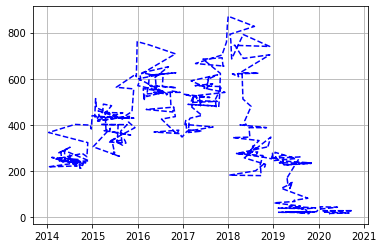

In [176]:
plt.plot(stock_prices.Date, stock_prices.Jet_Airways , color = 'blue', linestyle='dashed')
plt.grid(True)

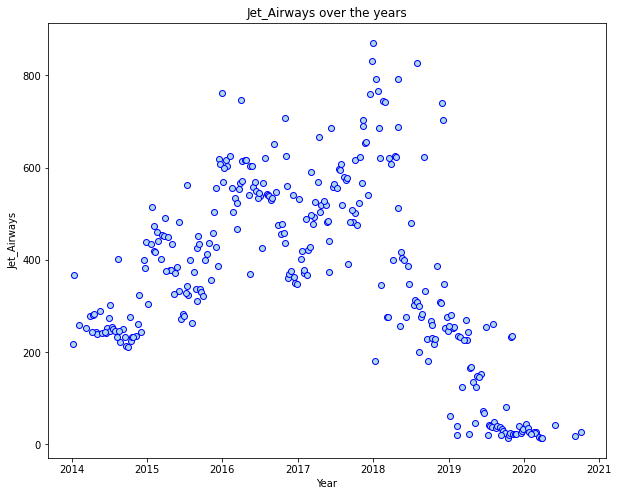

In [177]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Jet_Airways'], edgecolors='b', color = 'lightblue')

plt.xlabel('Year')
plt.ylabel('Jet_Airways')
plt.title('Jet_Airways over the years')
plt.show()

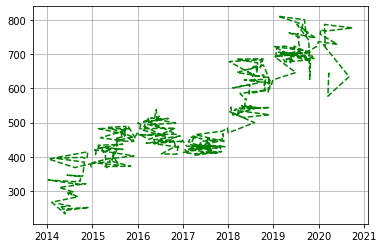

In [178]:
plt.plot(stock_prices.Date, stock_prices.Infosys , color = 'green', linestyle='dashed')
plt.grid(True)

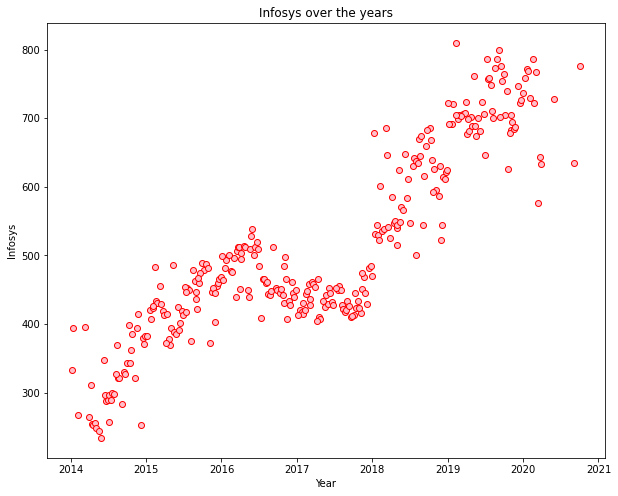

In [179]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

#### Analyzing returns

In [180]:
Stocks = np.log(Stocks.drop(['Date'],axis=1)).diff(axis = 0, periods = 1) 

#### Checking the rows & columns of dataset

In [181]:
Stocks.shape

(314, 10)

#### Checking top 5 rows

In [182]:
Stocks.tail()

Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank      SAIL  \
309  0.009649     -0.110348             0.030305  -0.057580 -0.087011   
310 -0.139625     -0.051293            -0.093819  -0.145324 -0.095310   
311 -0.094207     -0.236389            -0.285343  -0.284757 -0.105361   
312  0.109856     -0.182322            -0.091269  -0.173019 -0.251314   
313 -0.017228      0.000000            -0.031198   0.051432  0.090972   

     Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
309      0.023688    0.072383     -0.053346      -0.287682    -0.127833  
310     -0.081183   -0.043319     -0.187816       0.693147    -0.200671  
311     -0.119709   -0.050745     -0.141830      -0.693147    -0.117783  
312     -0.067732   -0.076851     -0.165324       0.000000    -0.133531  
313     -0.006816    0.040585     -0.081917       0.000000     0.000000

In [183]:
Stocks.Idea_Vodafone.sum()

-3.3202283191284887

In [184]:
Stocks.describe().T

count      mean       std       min       25%       50%  \
Infosys              313.0  0.002794  0.035070 -0.167300 -0.014514  0.004376   
Indian_Hotel         313.0  0.000266  0.047131 -0.236389 -0.023530  0.000000   
Mahindra_&_Mahindra  313.0 -0.001506  0.040169 -0.285343 -0.020884  0.001526   
Axis_Bank            313.0  0.001167  0.045828 -0.284757 -0.022473  0.001614   
SAIL                 313.0 -0.003463  0.062188 -0.251314 -0.040822  0.000000   
Shree_Cement         313.0  0.003681  0.039917 -0.129215 -0.019546  0.003173   
Sun_Pharma           313.0 -0.001455  0.045033 -0.179855 -0.020699  0.001530   
Jindal_Steel         313.0 -0.004123  0.075108 -0.283768 -0.049700  0.000000   
Idea_Vodafone        313.0 -0.010608  0.104315 -0.693147 -0.045120  0.000000   
Jet_Airways          313.0 -0.009548  0.097972 -0.458575 -0.052644 -0.005780   

                          75%       max  
Infosys              0.024553  0.135666  
Indian_Hotel         0.027909  0.199333  
Mahindra_&_Mahindra  0.019894  0.089407  
Axis_Bank            0.028522  0.127461  
SAIL                 0.032790  0.309005  
Shree_Cement         0.029873  0.152329  
Sun_Pharma           0.023257  0.166604  
Jindal_Steel         0.037179  0.243978  
Idea_Vodafone        0.024391  0.693147  
Jet_Airways          0.036368  0.300249

In [185]:
Stocks.loc['Total'] = Stocks.sum().reindex(Stocks.columns, fill_value='')

In [186]:
Stocks.tail().T.sort_values(by='Total', ascending=False)

310       311       312       313     Total
Shree_Cement        -0.081183 -0.119709 -0.067732 -0.006816  1.152290
Infosys             -0.139625 -0.094207  0.109856 -0.017228  0.874521
Axis_Bank           -0.145324 -0.284757 -0.173019  0.051432  0.365382
Indian_Hotel        -0.051293 -0.236389 -0.182322  0.000000  0.083382
Sun_Pharma          -0.043319 -0.050745 -0.076851  0.040585 -0.455337
Mahindra_&_Mahindra -0.093819 -0.285343 -0.091269 -0.031198 -0.471323
SAIL                -0.095310 -0.105361 -0.251314  0.090972 -1.084013
Jindal_Steel        -0.187816 -0.141830 -0.165324 -0.081917 -1.290374
Jet_Airways         -0.200671 -0.117783 -0.133531  0.000000 -2.988564
Idea_Vodafone        0.693147 -0.693147  0.000000  0.000000 -3.320228

### We now look at Means & Standard Deviations of these returns
#### Stock Means: Average returns that the stock is making on a week to week basis
#### Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

#### Calculating stock means

In [187]:
stock_means = Stocks.mean(axis = 0)
stock_means

Infosys                0.005570
Indian_Hotel           0.000531
Mahindra_&_Mahindra   -0.003002
Axis_Bank              0.002327
SAIL                  -0.006905
Shree_Cement           0.007339
Sun_Pharma            -0.002900
Jindal_Steel          -0.008219
Idea_Vodafone         -0.021148
Jet_Airways           -0.019035
dtype: float64

#### Calculating stock standard deviation

In [188]:
stock_sd = Stocks.std(axis = 0)
stock_sd

Infosys                0.060383
Indian_Hotel           0.047288
Mahindra_&_Mahindra    0.048077
Axis_Bank              0.050159
SAIL                   0.087025
Shree_Cement           0.076091
Sun_Pharma             0.051746
Jindal_Steel           0.104366
Idea_Vodafone          0.213848
Jet_Airways            0.194501
dtype: float64

In [189]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df.sort_values(by='Average', ascending= False)

Average  Volatility
Shree_Cement         0.007339    0.076091
Infosys              0.005570    0.060383
Axis_Bank            0.002327    0.050159
Indian_Hotel         0.000531    0.047288
Sun_Pharma          -0.002900    0.051746
Mahindra_&_Mahindra -0.003002    0.048077
SAIL                -0.006905    0.087025
Jindal_Steel        -0.008219    0.104366
Jet_Airways         -0.019035    0.194501
Idea_Vodafone       -0.021148    0.213848

In [216]:
df.sort_values(by='Volatility', ascending= False)

Average  Volatility
Idea_Vodafone       -0.021148    0.213848
Jet_Airways         -0.019035    0.194501
Jindal_Steel        -0.008219    0.104366
SAIL                -0.006905    0.087025
Shree_Cement         0.007339    0.076091
Infosys              0.005570    0.060383
Sun_Pharma          -0.002900    0.051746
Axis_Bank            0.002327    0.050159
Mahindra_&_Mahindra -0.003002    0.048077
Indian_Hotel         0.000531    0.047288

In [204]:
print('Mean for Averages of all the stocks from Sample data is : ',df.Average.mean())

Mean for Averages of all the stocks from Sample data is :  -0.004544117653834371


In [206]:
print('Mean for Volatility of all the stocks from Sample data is : ',df.Volatility.mean())

Mean for Volatility of all the stocks from Sample data is :  0.09334834662321471


#### Let us plot & see what they say about stock prices

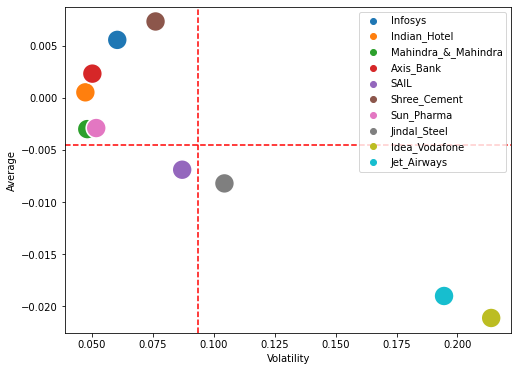

In [215]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plt.figure(figsize = (8,6))
plot = sns.scatterplot(df['Volatility'], df['Average'],hue=df.index, s=400)
plot.axvline(x=0.09334834662321471,linestyle='--', color = "red")
plot.axhline(y=-0.004544117653834371,linestyle='--', color = "red")
plt.show()